#**Desafío No. 3: Telecom X Parte 2**

**Diccionario de datos**

* customerID: número de identificación único de cada cliente
* Churn: si el cliente dejó o no la empresa
* gender: género (masculino y femenino)
* SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
* Partner: si el cliente tiene o no una pareja
* Dependents: si el cliente tiene o no dependientes
* tenure: meses de contrato del cliente
* PhoneService: suscripción al servicio telefónico
* MultipleLines: suscripción a más de una línea telefónica
* InternetService: suscripción a un proveedor de internet
* OnlineSecurity: suscripción adicional de seguridad en línea
* OnlineBackup: suscripción adicional de respaldo en línea
* DeviceProtection: suscripción adicional de protección del dispositivo
* TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
* StreamingTV: suscripción de televisión por cable
* StreamingMovies: suscripción de streaming de películas
* Contract: tipo de contrato
* PaperlessBilling: si el cliente prefiere recibir la factura en línea
* PaymentMethod: forma de pago
* Charges.Monthly: total de todos los servicios del cliente por mes
* Charges.Total: total gastado por el cliente

Link de la información: https://github.com/ingridcristh/challenge2-data-science-LATAM/blob/main/TelecomX_Data.json

https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json

#📌 **Extracción**

In [ ]:
# importar librerias necesarias
import requests
import pandas as pd
import numpy as np
#librerias gráficas
import seaborn as sns
import matplotlib.pyplot as plt
import yellowbrick
import plotly.express as px

In [ ]:
#leer dataframe generado Desafio parte 1
datos_telecom_cargados=pd.read_csv('df_telecomx_normalizados.csv')
datos_telecom_cargados

,ID_cliente,Churn (Si/No),Genero,Persona_mayor_65_años(Si/No),Pareja(Si/No),Dependientes(Si/No),Antiguedad del cliente (meses),Suscr_Servicio_telefónico(Si/No),Suscr_multiples_líneas_telefónicas(3),Suscr_Servicio_internet(3),...,Suscr_Adi_Protección_del_dispositivo(3),Suscr_Adi_Soporte_técnico(3),Suscr_Televisión_por_cable(3),Suscr_Streaming_de_películas(3),Contrato,Factura_en_linea(Si/No),Metodo_de_pago,Mensual,Total,Cuentas_Diarias
0,0002-ORFBO,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.60,593.30,2.186667
1,0003-MKNFE,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.90,280.85,2.463333
3,0011-IGKFF,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,no,female,0,no,no,13,yes,no,dsl,...,no,yes,no,no,one year,no,mailed check,55.15,742.90,1.838333
7039,9992-RRAMN,yes,male,0,yes,no,22,yes,yes,fiber optic,...,no,no,no,yes,month-to-month,yes,electronic check,85.10,1873.70,2.836667
7040,9992-UJOEL,no,male,0,no,no,2,yes,no,dsl,...,no,no,no,no,month-to-month,yes,mailed check,50.30,92.75,1.676667
7041,9993-LHIEB,no,male,0,yes,yes,67,yes,no,dsl,...,yes,yes,no,yes,two year,no,mailed check,67.85,4627.65,2.261667


In [ ]:
#Datos se usa el metodo .info() para ver los datos de los datos

datos_telecom_cargados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID_cliente                               7043 non-null   object 
 1   Churn (Si/No)                            7043 non-null   object 
 2   Genero                                   7043 non-null   object 
 3   Persona_mayor_65_años(Si/No)             7043 non-null   int64  
 4   Pareja(Si/No)                            7043 non-null   object 
 5   Dependientes(Si/No)                      7043 non-null   object 
 6   Antiguedad del cliente (meses)           7043 non-null   int64  
 7   Suscr_Servicio_telefónico(Si/No)         7043 non-null   object 
 8   Suscr_multiples_líneas_telefónicas(3)    7043 non-null   object 
 9   Suscr_Servicio_internet(3)               7043 non-null   object 
 10  Suscr_Adi_seguridad_en_línea(3)          7043 no

## **Preparación de los datos**

In [ ]:
#la columna ID_cliente no es importante para realizar el modelo se puede eliminar
datos_telecom_cargados = datos_telecom_cargados.drop(columns='ID_cliente')
#ver como quedaron las columnas de la bd datos
datos_telecom_cargados.columns

Index(['Churn (Si/No)', 'Genero', 'Persona_mayor_65_años(Si/No)',
       'Pareja(Si/No)', 'Dependientes(Si/No)',
       'Antiguedad del cliente (meses)', 'Suscr_Servicio_telefónico(Si/No)',
       'Suscr_multiples_líneas_telefónicas(3)', 'Suscr_Servicio_internet(3)',
       'Suscr_Adi_seguridad_en_línea(3)', 'Suscr_Adi_Respaldo_en_línea(3)',
       'Suscr_Adi_Protección_del_dispositivo(3)',
       'Suscr_Adi_Soporte_técnico(3)', 'Suscr_Televisión_por_cable(3)',
       'Suscr_Streaming_de_películas(3)', 'Contrato',
       'Factura_en_linea(Si/No)', 'Metodo_de_pago', 'Mensual', 'Total',
       'Cuentas_Diarias'],
      dtype='object')

In [ ]:
#verificar los valores unicos en cada columna
for col in datos_telecom_cargados.columns:
  print(f"Valores Unicos en la columna llamada'{col}':{datos_telecom_cargados[col].nunique()}")
  if datos_telecom_cargados[col].nunique() < 50:
    print(datos_telecom_cargados[col].unique())
    print('-' * 50 )

Valores Unicos en la columna llamada'Churn (Si/No)':2
['no' 'yes']
--------------------------------------------------
Valores Unicos en la columna llamada'Genero':2
['female' 'male']
--------------------------------------------------
Valores Unicos en la columna llamada'Persona_mayor_65_años(Si/No)':2
[0 1]
--------------------------------------------------
Valores Unicos en la columna llamada'Pareja(Si/No)':2
['yes' 'no']
--------------------------------------------------
Valores Unicos en la columna llamada'Dependientes(Si/No)':2
['yes' 'no']
--------------------------------------------------
Valores Unicos en la columna llamada'Antiguedad del cliente (meses)':73
Valores Unicos en la columna llamada'Suscr_Servicio_telefónico(Si/No)':2
['yes' 'no']
--------------------------------------------------
Valores Unicos en la columna llamada'Suscr_multiples_líneas_telefónicas(3)':3
['no' 'yes' 'no phone service']
--------------------------------------------------
Valores Unicos en la columna

⚠️ **El problema original con las variables servicios adicionales**

* Variables como `Suscr_Adi_seguridad_en_línea(3)`, `Suscr_Adi_Respaldo_en_línea(3)`, `Suscr_Adi_Protección_del_dispositivo(3)`, `Suscr_Adi_Soporte_técnico(3)`, `Suscr_Televisión_por_cable(3)`, `Suscr_Streaming_de_películas(3)`, tenían **tres categorías**:

  * `"Yes"` → cliente usa el servicio X
  * `"No"` → cliente tiene internet, pero no contrató el servicio
  * `"No internet service"` → cliente **no tiene servicio de internet**, por lo tanto no puede usar el servicio

In [ ]:
#ver datos de la columna
datos_telecom_cargados['Suscr_Adi_seguridad_en_línea(3)'].unique()

array(['no', 'yes', 'no internet service'], dtype=object)

Para comenzar el anterior problema se busca agrupar las opción 'no phone service' con la opción 'no', para evitar que la respuesta a esta variable se presente la multicolinealidad. Es decir esta variable solotendra de respuesta 'No' y 'Si'.


In [ ]:
# crear una copia del dataframe

datos_telecom_final = datos_telecom_cargados.copy()

In [ ]:
#guardar en una variable las columnas de 3 categorias

columnas_3_categorias = ['Suscr_Adi_seguridad_en_línea(3)','Suscr_Adi_Respaldo_en_línea(3)',
                         'Suscr_Adi_Protección_del_dispositivo(3)','Suscr_Adi_Soporte_técnico(3)',
                         'Suscr_Televisión_por_cable(3)', 'Suscr_Streaming_de_películas(3)']

In [ ]:
#reemplazar el 'no internet service' por 'no'
#para la columna en la lista de columnas, la columna del df con nombre 'columna' es igual
#en la columna del df con nombre 'columna' reemplazar la opcion no 'no internet service' por 'no'

for columna in columnas_3_categorias:
  datos_telecom_final[columna] = datos_telecom_final[columna].replace('no internet service', 'no')

In [ ]:
#ver datos columna Suscr_Adi_seguridad_en_línea(3)
datos_telecom_final['Suscr_Adi_seguridad_en_línea(3)'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
#ver datos columna Suscr_Adi_seguridad_en_línea(3)
datos_telecom_final['Suscr_multiples_líneas_telefónicas(3)'].unique()

array(['no', 'yes', 'no phone service'], dtype=object)


##**Encoding**

Se va a realizar el Encoding con OneHotEncoding para las variables categoricas nominales, que son todas aquellas de tipo object. Lo anterior, es con el fin de convertir las variables categoricas a numéricas para poder usar las variables en ML.

In [ ]:
# importar las librerias para hacer la transformacion de las variables explicativas

#modulo para generar la transformacion de las variables
from sklearn.compose import make_column_transformer
#modulo para realizar la transformacion se establece la forma de transformacion
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#crear variable columnas para guardar el titulo de las columnas variables expli.

variables_explicativas = datos_telecom_final.drop('Churn (Si/No)',axis=1)

variables_explicativas

,Genero,Persona_mayor_65_años(Si/No),Pareja(Si/No),Dependientes(Si/No),Antiguedad del cliente (meses),Suscr_Servicio_telefónico(Si/No),Suscr_multiples_líneas_telefónicas(3),Suscr_Servicio_internet(3),Suscr_Adi_seguridad_en_línea(3),Suscr_Adi_Respaldo_en_línea(3),Suscr_Adi_Protección_del_dispositivo(3),Suscr_Adi_Soporte_técnico(3),Suscr_Televisión_por_cable(3),Suscr_Streaming_de_películas(3),Contrato,Factura_en_linea(Si/No),Metodo_de_pago,Mensual,Total,Cuentas_Diarias
0,female,0,yes,yes,9,yes,no,dsl,no,yes,no,yes,yes,no,one year,yes,mailed check,65.60,593.30,2.186667
1,male,0,no,no,9,yes,yes,dsl,no,no,no,no,no,yes,month-to-month,no,mailed check,59.90,542.40,1.996667
2,male,0,no,no,4,yes,no,fiber optic,no,no,yes,no,no,no,month-to-month,yes,electronic check,73.90,280.85,2.463333
3,male,1,yes,no,13,yes,no,fiber optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic check,98.00,1237.85,3.266667
4,female,1,yes,no,3,yes,no,fiber optic,no,no,no,yes,yes,no,month-to-month,yes,mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,female,0,no,no,13,yes,no,dsl,yes,no,no,yes,no,no,one year,no,mailed check,55.15,742.90,1.838333
7039,male,0,yes,no,22,yes,yes,fiber optic,no,no,no,no,no,yes,month-to-month,yes,electronic check,85.10,1873.70,2.836667
7040,male,0,no,no,2,yes,no,dsl,no,yes,no,no,no,no,month-to-month,yes,mailed check,50.30,92.75,1.676667
7041,male,0,yes,yes,67,yes,no,dsl,yes,no,yes,yes,no,yes,two year,no,mailed check,67.85,4627.65,2.261667


In [ ]:
#definir variable con las columnas explicativas
columnas_variables_explicativas = variables_explicativas.columns
columnas_variables_explicativas

Index(['Genero', 'Persona_mayor_65_años(Si/No)', 'Pareja(Si/No)',
       'Dependientes(Si/No)', 'Antiguedad del cliente (meses)',
       'Suscr_Servicio_telefónico(Si/No)',
       'Suscr_multiples_líneas_telefónicas(3)', 'Suscr_Servicio_internet(3)',
       'Suscr_Adi_seguridad_en_línea(3)', 'Suscr_Adi_Respaldo_en_línea(3)',
       'Suscr_Adi_Protección_del_dispositivo(3)',
       'Suscr_Adi_Soporte_técnico(3)', 'Suscr_Televisión_por_cable(3)',
       'Suscr_Streaming_de_películas(3)', 'Contrato',
       'Factura_en_linea(Si/No)', 'Metodo_de_pago', 'Mensual', 'Total',
       'Cuentas_Diarias'],
      dtype='object')

In [ ]:
# crear una variable que almacena las columnas a ajustar

columnas_var_categoricas = ['Genero', 'Pareja(Si/No)', 'Dependientes(Si/No)',
       'Suscr_Servicio_telefónico(Si/No)',
       'Suscr_multiples_líneas_telefónicas(3)', 'Suscr_Servicio_internet(3)',
       'Suscr_Adi_seguridad_en_línea(3)', 'Suscr_Adi_Respaldo_en_línea(3)',
       'Suscr_Adi_Protección_del_dispositivo(3)',
       'Suscr_Adi_Soporte_técnico(3)', 'Suscr_Televisión_por_cable(3)',
       'Suscr_Streaming_de_películas(3)', 'Contrato',
       'Factura_en_linea(Si/No)', 'Metodo_de_pago']
columnas_var_categoricas

['Genero',
 'Pareja(Si/No)',
 'Dependientes(Si/No)',
 'Suscr_Servicio_telefónico(Si/No)',
 'Suscr_multiples_líneas_telefónicas(3)',
 'Suscr_Servicio_internet(3)',
 'Suscr_Adi_seguridad_en_línea(3)',
 'Suscr_Adi_Respaldo_en_línea(3)',
 'Suscr_Adi_Protección_del_dispositivo(3)',
 'Suscr_Adi_Soporte_técnico(3)',
 'Suscr_Televisión_por_cable(3)',
 'Suscr_Streaming_de_películas(3)',
 'Contrato',
 'Factura_en_linea(Si/No)',
 'Metodo_de_pago']

In [ ]:
#crear variable con las especificaciones de la transformacion

one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'), # La opción drop='if_binary' significa que si una columna solo tiene 2 categorías (binaria), el encoder creará solo una columna (en lugar de dos), ya que una columna es suficiente para representar la información (evita la "trampa de las variables ficticias").
                                   columnas_var_categoricas), # Es la lista de columnas categóricas sobre las que se aplicará el OneHotEncoder.
                                   remainder='passthrough', #Indica que todas las demás columnas (las que no están en la lista anterior) no se transforman y se pasan tal cual al resultado.
                                   sparse_threshold=0,    # Por defecto, OneHotEncoder genera una matriz dispersa (sparse matrix), que es eficiente en memoria. sparse_threshold=0 significa que el resultado final será siempre una matriz densa (array completo) en vez de dispersa.
                                   force_int_remainder_cols=False # Esto controla el tipo de dato de las columnas que pasan sin transformar (remainder). False significa que mantendrá el tipo original (por ejemplo, float si era float, int si era int).
                                   )

In [ ]:
# se aplica el ajuste de transformacion a la variable X, variable explicativa
# y se guarda en la variable X

X = one_hot.fit_transform(variables_explicativas)

In [ ]:
#mostrar la variable X
X

array([[0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        6.56000000e+01, 5.93300000e+02, 2.18666667e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.99000000e+01, 5.42400000e+02, 1.99666667e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.39000000e+01, 2.80850000e+02, 2.46333333e+00],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.03000000e+01, 9.27500000e+01, 1.67666667e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        6.78500000e+01, 4.62765000e+03, 2.26166667e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        5.90000000e+01, 3.70760000e+03, 1.96666667e+00]])

In [ ]:
#ver los nombres de las columnas del df transformado

one_hot.get_feature_names_out(columnas_variables_explicativas)

array(['onehotencoder__Genero_male', 'onehotencoder__Pareja(Si/No)_yes',
       'onehotencoder__Dependientes(Si/No)_yes',
       'onehotencoder__Suscr_Servicio_telefónico(Si/No)_yes',
       'onehotencoder__Suscr_multiples_líneas_telefónicas(3)_no',
       'onehotencoder__Suscr_multiples_líneas_telefónicas(3)_no phone service',
       'onehotencoder__Suscr_multiples_líneas_telefónicas(3)_yes',
       'onehotencoder__Suscr_Servicio_internet(3)_dsl',
       'onehotencoder__Suscr_Servicio_internet(3)_fiber optic',
       'onehotencoder__Suscr_Servicio_internet(3)_no',
       'onehotencoder__Suscr_Adi_seguridad_en_línea(3)_yes',
       'onehotencoder__Suscr_Adi_Respaldo_en_línea(3)_yes',
       'onehotencoder__Suscr_Adi_Protección_del_dispositivo(3)_yes',
       'onehotencoder__Suscr_Adi_Soporte_técnico(3)_yes',
       'onehotencoder__Suscr_Televisión_por_cable(3)_yes',
       'onehotencoder__Suscr_Streaming_de_películas(3)_yes',
       'onehotencoder__Contrato_month-to-month',
       'one

In [ ]:
#crear df variables explicativas
#parametro nombres de la columnas-variables explicativas

X=pd.DataFrame(X,columns=one_hot.get_feature_names_out(columnas_variables_explicativas))
X

,onehotencoder__Genero_male,onehotencoder__Pareja(Si/No)_yes,onehotencoder__Dependientes(Si/No)_yes,onehotencoder__Suscr_Servicio_telefónico(Si/No)_yes,onehotencoder__Suscr_multiples_líneas_telefónicas(3)_no,onehotencoder__Suscr_multiples_líneas_telefónicas(3)_no phone service,onehotencoder__Suscr_multiples_líneas_telefónicas(3)_yes,onehotencoder__Suscr_Servicio_internet(3)_dsl,onehotencoder__Suscr_Servicio_internet(3)_fiber optic,onehotencoder__Suscr_Servicio_internet(3)_no,...,onehotencoder__Factura_en_linea(Si/No)_yes,onehotencoder__Metodo_de_pago_bank transfer automatic,onehotencoder__Metodo_de_pago_credit card automatic,onehotencoder__Metodo_de_pago_electronic check,onehotencoder__Metodo_de_pago_mailed check,remainder__Persona_mayor_65_años(Si/No),remainder__Antiguedad del cliente (meses),remainder__Mensual,remainder__Total,remainder__Cuentas_Diarias
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,9.0,65.60,593.30,2.186667
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,9.0,59.90,542.40,1.996667
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,4.0,73.90,280.85,2.463333
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,13.0,98.00,1237.85,3.266667
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,3.0,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,13.0,55.15,742.90,1.838333
7039,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,22.0,85.10,1873.70,2.836667
7040,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,2.0,50.30,92.75,1.676667
7041,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,67.0,67.85,4627.65,2.261667


In [ ]:
#VER INFO X
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   onehotencoder__Genero_male                                             7043 non-null   float64
 1   onehotencoder__Pareja(Si/No)_yes                                       7043 non-null   float64
 2   onehotencoder__Dependientes(Si/No)_yes                                 7043 non-null   float64
 3   onehotencoder__Suscr_Servicio_telefónico(Si/No)_yes                    7043 non-null   float64
 4   onehotencoder__Suscr_multiples_líneas_telefónicas(3)_no                7043 non-null   float64
 5   onehotencoder__Suscr_multiples_líneas_telefónicas(3)_no phone service  7043 non-null   float64
 6   onehotencoder__Suscr_multiples_líneas_telefónicas(3)_yes               7043 non-null   f

In [ ]:
##importar el modul labelencoder, se usa para hacer la transformacion de la variable respuesta

from sklearn.preprocessing import LabelEncoder

In [ ]:
#crear variable para guardar la funcion labelEncoder()

label_encoder = LabelEncoder()

In [ ]:
#establecer la variable y que es la variable respuesta
y = datos_telecom_final['Churn (Si/No)']

In [ ]:
# aplciar la tranformacion ajsutada a la variable respuesta y

y = label_encoder.fit_transform(y)

In [ ]:
#mostrar variable respuesta
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
#crear dataframe para la variable respuesta
y=pd.DataFrame(y,columns=['Churn (Si/No)'])
y

,Churn (Si/No)
0,0
1,0
2,1
3,1
4,1
...,...
7038,0
7039,1
7040,0
7041,0


In [ ]:
#crear df que una las variables explicativas y la variable respuesta
df_telecomx_encoding = pd.concat([X,y],axis=1)
df_telecomx_encoding

,onehotencoder__Genero_male,onehotencoder__Pareja(Si/No)_yes,onehotencoder__Dependientes(Si/No)_yes,onehotencoder__Suscr_Servicio_telefónico(Si/No)_yes,onehotencoder__Suscr_multiples_líneas_telefónicas(3)_no,onehotencoder__Suscr_multiples_líneas_telefónicas(3)_no phone service,onehotencoder__Suscr_multiples_líneas_telefónicas(3)_yes,onehotencoder__Suscr_Servicio_internet(3)_dsl,onehotencoder__Suscr_Servicio_internet(3)_fiber optic,onehotencoder__Suscr_Servicio_internet(3)_no,...,onehotencoder__Metodo_de_pago_bank transfer automatic,onehotencoder__Metodo_de_pago_credit card automatic,onehotencoder__Metodo_de_pago_electronic check,onehotencoder__Metodo_de_pago_mailed check,remainder__Persona_mayor_65_años(Si/No),remainder__Antiguedad del cliente (meses),remainder__Mensual,remainder__Total,remainder__Cuentas_Diarias,Churn (Si/No)
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,9.0,65.60,593.30,2.186667,0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,9.0,59.90,542.40,1.996667,0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,4.0,73.90,280.85,2.463333,1
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,13.0,98.00,1237.85,3.266667,1
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,3.0,83.90,267.40,2.796667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,13.0,55.15,742.90,1.838333,0
7039,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,22.0,85.10,1873.70,2.836667,1
7040,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2.0,50.30,92.75,1.676667,0
7041,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,67.0,67.85,4627.65,2.261667,0


#**Correlación de todos los datos**

El coeficiente de correlación de Pearson nos permite medir la relación lineal entre variables, ofreciendo una escala que varía de -1 a 1, la cual interpretamos según su intensidad y dirección:

* **-1**: correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye.  
* **0**: no hay relación lineal entre las variables.  
* **1**: correlación positiva perfecta: a medida que una variable aumenta, la otra también aumenta.  


In [ ]:
# Correlación
#crear variable corr
corr = df_telecomx_encoding.corr()
#mostrar matriz
corr

,onehotencoder__Genero_male,onehotencoder__Pareja(Si/No)_yes,onehotencoder__Dependientes(Si/No)_yes,onehotencoder__Suscr_Servicio_telefónico(Si/No)_yes,onehotencoder__Suscr_multiples_líneas_telefónicas(3)_no,onehotencoder__Suscr_multiples_líneas_telefónicas(3)_no phone service,onehotencoder__Suscr_multiples_líneas_telefónicas(3)_yes,onehotencoder__Suscr_Servicio_internet(3)_dsl,onehotencoder__Suscr_Servicio_internet(3)_fiber optic,onehotencoder__Suscr_Servicio_internet(3)_no,...,onehotencoder__Metodo_de_pago_bank transfer automatic,onehotencoder__Metodo_de_pago_credit card automatic,onehotencoder__Metodo_de_pago_electronic check,onehotencoder__Metodo_de_pago_mailed check,remainder__Persona_mayor_65_años(Si/No),remainder__Antiguedad del cliente (meses),remainder__Mensual,remainder__Total,remainder__Cuentas_Diarias,Churn (Si/No)
onehotencoder__Genero_male,1.000000,-0.001808,0.010517,-0.006488,0.004476,0.006488,-0.008414,0.006568,-0.011286,0.006026,...,-0.016024,0.001215,0.000752,0.013744,-0.001874,0.005106,-0.014569,-0.000080,-0.014569,-0.008612
onehotencoder__Pareja(Si/No)_yes,-0.001808,1.000000,0.452676,0.017706,-0.129929,-0.017706,0.142057,-0.000851,0.000304,0.000615,...,0.110706,0.082029,-0.083852,-0.095125,0.016479,0.379697,0.096848,0.317504,0.096848,-0.150448
onehotencoder__Dependientes(Si/No)_yes,0.010517,0.452676,1.000000,-0.001762,0.023198,0.001762,-0.024526,0.052010,-0.165818,0.139812,...,0.052021,0.060267,-0.150642,0.059071,-0.211185,0.159712,-0.113890,0.062078,-0.113890,-0.164221
onehotencoder__Suscr_Servicio_telefónico(Si/No)_yes,-0.006488,0.017706,-0.001762,1.000000,0.315431,-1.000000,0.279690,-0.452425,0.289999,0.172209,...,0.007556,-0.007721,0.003062,-0.003319,0.008576,0.008448,0.247398,0.113214,0.247398,0.011942
onehotencoder__Suscr_multiples_líneas_telefónicas(3)_no,0.004476,-0.129929,0.023198,0.315431,1.000000,-0.315431,-0.822853,-0.070179,-0.190192,0.310046,...,-0.070178,-0.063921,-0.080836,0.222605,-0.136213,-0.323088,-0.338314,-0.396059,-0.338314,-0.032569
onehotencoder__Suscr_multiples_líneas_telefónicas(3)_no phone service,0.006488,-0.017706,0.001762,-1.000000,-0.315431,1.000000,-0.279690,0.452425,-0.289999,-0.172209,...,-0.007556,0.007721,-0.003062,0.003319,-0.008576,-0.008448,-0.247398,-0.113214,-0.247398,-0.011942
onehotencoder__Suscr_multiples_líneas_telefónicas(3)_yes,-0.008414,0.142057,-0.024526,0.279690,-0.822853,-0.279690,1.000000,-0.199920,0.366083,-0.210564,...,0.075527,0.060048,0.083618,-0.227206,0.142948,0.331941,0.490434,0.468504,0.490434,0.040102
onehotencoder__Suscr_Servicio_internet(3)_dsl,0.006568,-0.000851,0.052010,-0.452425,-0.070179,0.452425,-0.199920,1.000000,-0.640987,-0.380635,...,0.025476,0.051438,-0.104418,0.041899,-0.108322,0.013274,-0.160189,-0.052469,-0.160189,-0.124214
onehotencoder__Suscr_Servicio_internet(3)_fiber optic,-0.011286,0.000304,-0.165818,0.289999,-0.190192,-0.289999,0.366083,-0.640987,1.000000,-0.465793,...,-0.022624,-0.050077,0.336410,-0.306834,0.255338,0.019720,0.787066,0.361655,0.787066,0.308020
onehotencoder__Suscr_Servicio_internet(3)_no,0.006026,0.000615,0.139812,0.172209,0.310046,-0.172209,-0.210564,-0.380635,-0.465793,1.000000,...,-0.002113,0.001030,-0.284917,0.321361,-0.182742,-0.039062,-0.763557,-0.375223,-0.763557,-0.227890


In [ ]:
#muestra el calculo de la correlacion entre la variable dependiente Churn con las demás variables

corr['Churn (Si/No)']

,Churn (Si/No)
onehotencoder__Genero_male,-0.008612
onehotencoder__Pareja(Si/No)_yes,-0.150448
onehotencoder__Dependientes(Si/No)_yes,-0.164221
onehotencoder__Suscr_Servicio_telefónico(Si/No)_yes,0.011942
onehotencoder__Suscr_multiples_líneas_telefónicas(3)_no,-0.032569
onehotencoder__Suscr_multiples_líneas_telefónicas(3)_no phone service,-0.011942
onehotencoder__Suscr_multiples_líneas_telefónicas(3)_yes,0.040102
onehotencoder__Suscr_Servicio_internet(3)_dsl,-0.124214
onehotencoder__Suscr_Servicio_internet(3)_fiber optic,0.308020
onehotencoder__Suscr_Servicio_internet(3)_no,-0.227890


In [ ]:
# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

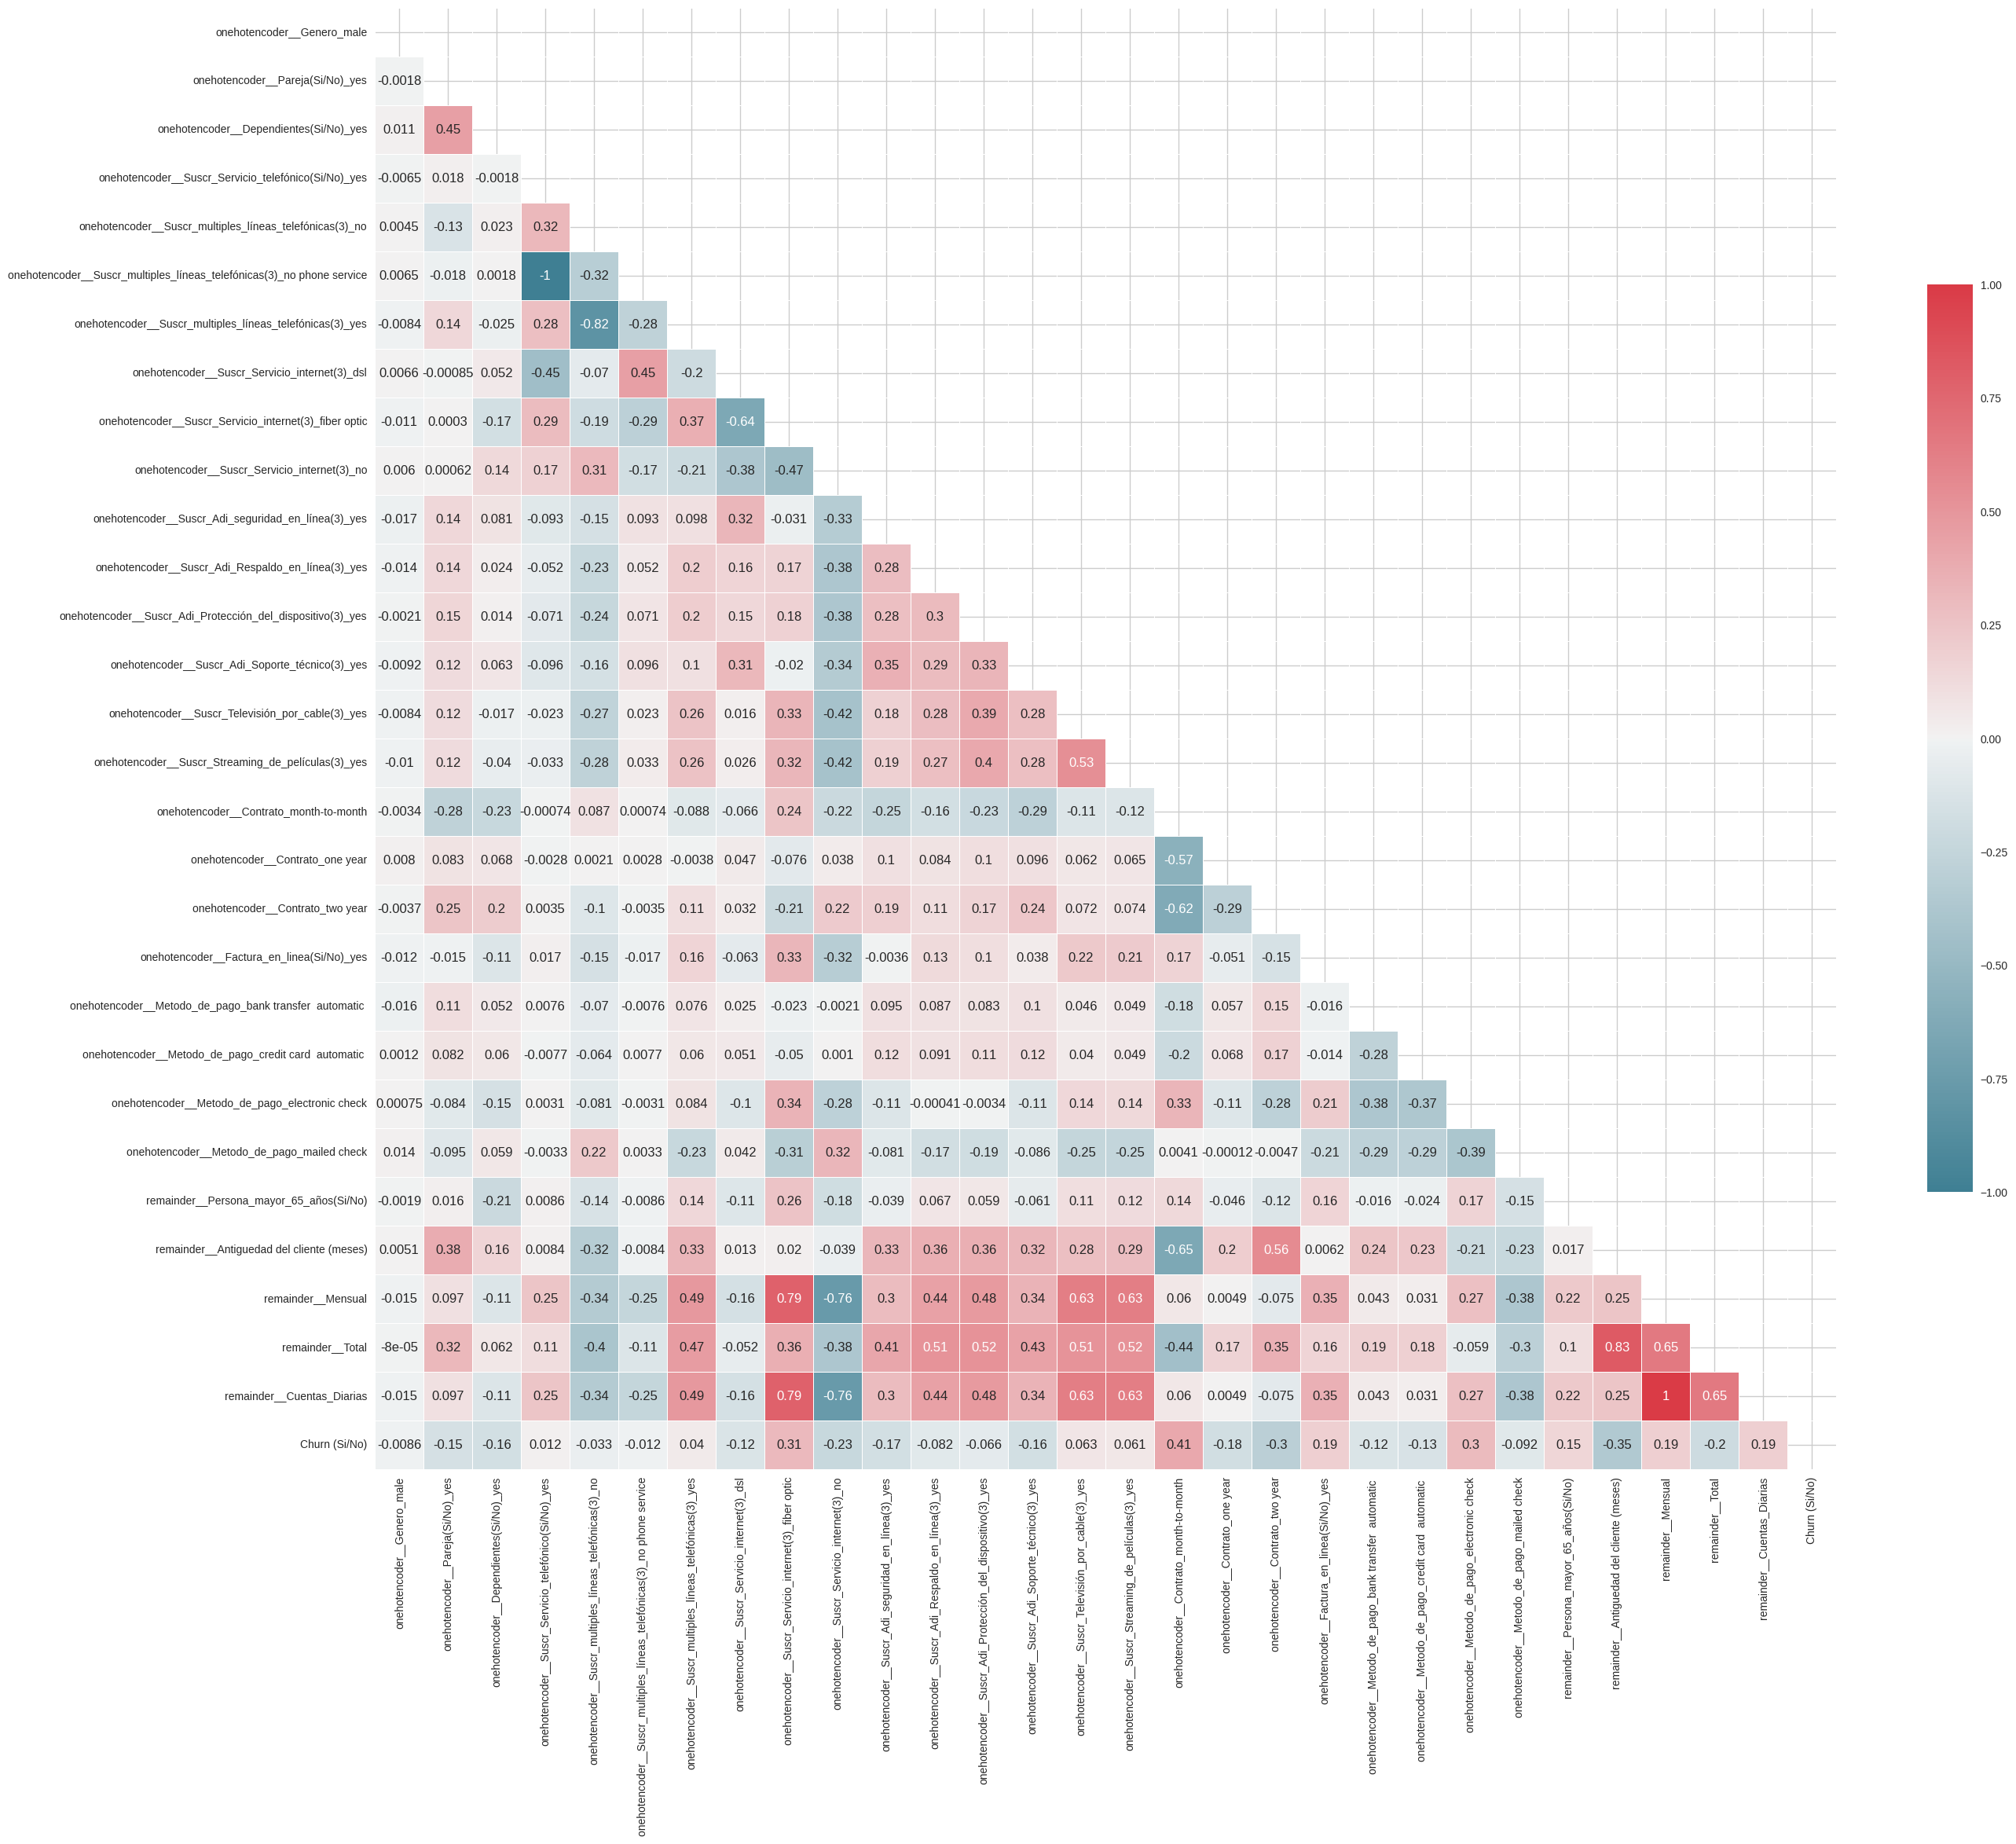

In [ ]:
# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(30, 30))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

Correlación con la variable CHURN:

Hay una correlación positiva con las variables Servicio Internet Fibra optica(0.31), Contrato Mes a mes(0.41), metodo de pago electronic check(0.30). VARIABLES QUE GENERAN CHURN
Correlacion negativa con las variables Contrato por dos años (-0.3), antiguedad del cliente (-0.35) Suscripcion soporte tecnico(-0.16) y seguridad en linea(-0.17). VARIABLES QUE GENERAN MENOS CHURN

##**Calcular la Multicolinealidad**

In [ ]:
# importar el VIF de statsmodel
#importar paquete Factor de Inflación de la Varianza o VIF
#para calcular VIF de cada uno de las variables de los modelos

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif


In [ ]:
#Crear variable con todas la variables explciativa
#VIF 1
#explicativas = tu_dataframe[['variable1', 'variable2', 'variable3']]
X_explicativas = df_telecomx_encoding[['onehotencoder__Genero_male', 'onehotencoder__Pareja(Si/No)_yes',
                                      'onehotencoder__Dependientes(Si/No)_yes',
                                      'onehotencoder__Suscr_Servicio_telefónico(Si/No)_yes',
                                      'onehotencoder__Suscr_multiples_líneas_telefónicas(3)_no',
                                      'onehotencoder__Suscr_multiples_líneas_telefónicas(3)_no phone service',
                                      'onehotencoder__Suscr_multiples_líneas_telefónicas(3)_yes',
                                      'onehotencoder__Suscr_Servicio_internet(3)_dsl',
                                      'onehotencoder__Suscr_Servicio_internet(3)_fiber optic',
                                      'onehotencoder__Suscr_Servicio_internet(3)_no',
                                      'onehotencoder__Suscr_Adi_seguridad_en_línea(3)_yes',
                                      'onehotencoder__Suscr_Adi_Respaldo_en_línea(3)_yes',
                                      'onehotencoder__Suscr_Adi_Protección_del_dispositivo(3)_yes',
                                      'onehotencoder__Suscr_Adi_Soporte_técnico(3)_yes',
                                      'onehotencoder__Suscr_Televisión_por_cable(3)_yes',
                                      'onehotencoder__Suscr_Streaming_de_películas(3)_yes',
                                      'onehotencoder__Contrato_month-to-month',
                                      'onehotencoder__Contrato_one year',
                                      'onehotencoder__Contrato_two year',
                                      'onehotencoder__Factura_en_linea(Si/No)_yes',
                                      'onehotencoder__Metodo_de_pago_bank transfer  automatic ',
                                      'onehotencoder__Metodo_de_pago_credit card  automatic ',
                                      'onehotencoder__Metodo_de_pago_electronic check',
                                      'onehotencoder__Metodo_de_pago_mailed check',
                                      'remainder__Persona_mayor_65_años(Si/No)',
                                      'remainder__Antiguedad del cliente (meses)', 'remainder__Mensual',
                                      'remainder__Total', 'remainder__Cuentas_Diarias']]

In [ ]:
#VIF 1
#vif = [VIF(explicativas.values, i) for i in range(explicativas.shape[1])]
#Usa una comprensión de listas para calcular el VIF para cada variable.
VFI = [vif(X_explicativas.values, i) for i in range(X_explicativas.shape[1])]

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
# VIF 1
# Crea un DataFrame para visualizar los resultados:
vif_data_1 = pd.DataFrame({'Variable':X_explicativas.columns, 'VIF': VFI})
print(vif_data_1)

# si el vif es mayor de 5 hay multicolinealidad
#si vif es menor a 5 no hay multicolinealidad

                                             Variable        VIF
0                          onehotencoder__Genero_male   1.002137
1                    onehotencoder__Pareja(Si/No)_yes   1.462701
2              onehotencoder__Dependientes(Si/No)_yes   1.384430
3   onehotencoder__Suscr_Servicio_telefónico(Si/No...        inf
4   onehotencoder__Suscr_multiples_líneas_telefóni...        inf
5   onehotencoder__Suscr_multiples_líneas_telefóni...        inf
6   onehotencoder__Suscr_multiples_líneas_telefóni...        inf
7       onehotencoder__Suscr_Servicio_internet(3)_dsl        inf
8   onehotencoder__Suscr_Servicio_internet(3)_fibe...        inf
9        onehotencoder__Suscr_Servicio_internet(3)_no        inf
10  onehotencoder__Suscr_Adi_seguridad_en_línea(3)...   6.336249
11  onehotencoder__Suscr_Adi_Respaldo_en_línea(3)_yes   6.782866
12  onehotencoder__Suscr_Adi_Protección_del_dispos...   6.922434
13    onehotencoder__Suscr_Adi_Soporte_técnico(3)_yes   6.467893
14   onehotencoder__Suscr

Se evidencia que el indice VIF para algunas variables se encuentra en rangos altos e infinitos.
Un VIF igual a infinito (inf) indica que existe una multicolinealidad perfecta en tus datos. Esto significa que una de las variables explicativas puede ser predicha exactamente por las otras variables en el conjunto de datos. En otras palabras, hay una redundancia total entre las variables. Se debe eliminar las variables con alta multicolinealidad, es decir con valor infinito o valores altos.

3.   onehotencoder__Suscr_Servicio_telefónico(Si/No)_yes
**4.   onehotencoder__Suscr_multiples_líneas_telefónicas(3)_no**

**5.   onehotencoder__Suscr_multiples_líneas_telefónicas(3)_no phone service**
6.   onehotencoder__Suscr_multiples_líneas_telefónicas(3)_yes  

---
Se elimina la columna Suscr_multiples_líneas_telefónicas(3)_no, debido a que hay relación entre la variable Suscr_Servicio_telefónico y Suscr_multiples_líneas_telefónicas(3)_no.
Se elimina la columna Suscr_multiples_líneas_telefónicas(3)_no phone service, ya que esta correlacionada con la variable Suscr_Servicio_telefónico.


7. onehotencoder__Suscr_Servicio_internet(3)_dsl     
8. onehotencoder__Suscr_Servicio_internet(3)_fiber optic
**9. onehotencoder__Suscr_Servicio_internet(3)_no**

---

Se elimina la variable Suscr_Servicio_internet(3)_no, ya que se correlaciona con la variable

16. onehotencoder__Contrato_month-to-month     
**17. onehotencoder__Contrato_one year**      
18. onehotencoder__Contrato_two year


---

Se elimina la variable Contrato_one year para disminuir la multicolinealidad

20. onehotencoder__Metodo_de_pago_bank transfer  automatic     
21. onehotencoder__Metodo_de_pago_credit card automatic
22. onehotencoder__Metodo_de_pago_electronic check
23. onehotencoder__Metodo_de_pago_mailed check




26. remainder__Mensual
27. remainder__Total
**28. remainder__Cuentas_Diarias**

---

Se elimina la variable Cuentas_Diarias, ya que esta se calculo con base en la variable Mensual


In [ ]:
X_explicativas_2 = df_telecomx_encoding[['onehotencoder__Genero_male', 'onehotencoder__Pareja(Si/No)_yes',
                                      'onehotencoder__Dependientes(Si/No)_yes',
                                      'onehotencoder__Suscr_Servicio_telefónico(Si/No)_yes',
                                      #'onehotencoder__Suscr_multiples_líneas_telefónicas(3)_no',
                                      #'onehotencoder__Suscr_multiples_líneas_telefónicas(3)_no phone service',
                                      'onehotencoder__Suscr_multiples_líneas_telefónicas(3)_yes',
                                      'onehotencoder__Suscr_Servicio_internet(3)_dsl',
                                      'onehotencoder__Suscr_Servicio_internet(3)_fiber optic',
                                      #'onehotencoder__Suscr_Servicio_internet(3)_no',
                                      'onehotencoder__Suscr_Adi_seguridad_en_línea(3)_yes',
                                      'onehotencoder__Suscr_Adi_Respaldo_en_línea(3)_yes',
                                      'onehotencoder__Suscr_Adi_Protección_del_dispositivo(3)_yes',
                                      'onehotencoder__Suscr_Adi_Soporte_técnico(3)_yes',
                                      'onehotencoder__Suscr_Televisión_por_cable(3)_yes',
                                      'onehotencoder__Suscr_Streaming_de_películas(3)_yes',
                                      'onehotencoder__Contrato_month-to-month',
                                      #'onehotencoder__Contrato_one year',
                                      'onehotencoder__Contrato_two year',
                                      'onehotencoder__Factura_en_linea(Si/No)_yes',
                                      'onehotencoder__Metodo_de_pago_bank transfer  automatic ',
                                      'onehotencoder__Metodo_de_pago_credit card  automatic ',
                                      'onehotencoder__Metodo_de_pago_electronic check',
                                      'onehotencoder__Metodo_de_pago_mailed check',
                                      'remainder__Persona_mayor_65_años(Si/No)',
                                      'remainder__Antiguedad del cliente (meses)',
                                      'remainder__Mensual',
                                      'remainder__Total'
                                      #'remainder__Cuentas_Diarias'
                                      ]]

In [ ]:
#VIF 2

#Usa una comprensión de listas para calcular el VIF para cada variable.
VIF_2 = [vif(X_explicativas_2.values, i) for i in range(X_explicativas_2.shape[1])]

In [ ]:
# VIF 2
# Crea un DataFrame para visualizar los resultados:
vif_data_2 = pd.DataFrame({'Variable':X_explicativas_2.columns, 'VIF': VIF_2})
print(vif_data_2)

# si el vif es mayor de 5 hay multicolinealidad
#si vif es menor a 5 no hay multicolinealidad

                                             Variable         VIF
0                          onehotencoder__Genero_male    1.002137
1                    onehotencoder__Pareja(Si/No)_yes    1.462701
2              onehotencoder__Dependientes(Si/No)_yes    1.384430
3   onehotencoder__Suscr_Servicio_telefónico(Si/No...   34.861565
4   onehotencoder__Suscr_multiples_líneas_telefóni...    7.273906
5       onehotencoder__Suscr_Servicio_internet(3)_dsl  138.518503
6   onehotencoder__Suscr_Servicio_internet(3)_fibe...  591.208934
7   onehotencoder__Suscr_Adi_seguridad_en_línea(3)...    6.336249
8   onehotencoder__Suscr_Adi_Respaldo_en_línea(3)_yes    6.782866
9   onehotencoder__Suscr_Adi_Protección_del_dispos...    6.922434
10    onehotencoder__Suscr_Adi_Soporte_técnico(3)_yes    6.467893
11   onehotencoder__Suscr_Televisión_por_cable(3)_yes   24.056827
12  onehotencoder__Suscr_Streaming_de_películas(3)...   24.110253
13             onehotencoder__Contrato_month-to-month    2.426940
14        

Resultados VIF:
Las variables que tienen un TIF alto son:
* Suscr_Servicio_telefónico(Si/No)_yes  (34.86)
* Suscr_Servicio_internet(3)_dsl  (138.51)
* Suscr_Servicio_internet(3)_fiber optic  (591.20)
* Suscr_Televisión_por_cable(3)_yes (24.05)
* Suscr_Streaming_de_películas(3)_yes. (24.11)
* Metodo_de_pago_electronic check (14.72)
* **Mensual (865.06)**
* Total (10.79)

Teniendo en cuenta los anterior se soluciono la colinealidad perfecta, pero aun así se evidencia TIFs altos. Se eliminara la variable Mensual ya que hay cierta correlación con la variable Total.

In [ ]:
#CALCULO VIF 3
X_explicativas_3 = df_telecomx_encoding[['onehotencoder__Genero_male', 'onehotencoder__Pareja(Si/No)_yes',
                                      'onehotencoder__Dependientes(Si/No)_yes',
                                      'onehotencoder__Suscr_Servicio_telefónico(Si/No)_yes',
                                      #'onehotencoder__Suscr_multiples_líneas_telefónicas(3)_no',
                                      #'onehotencoder__Suscr_multiples_líneas_telefónicas(3)_no phone service'
                                      'onehotencoder__Suscr_multiples_líneas_telefónicas(3)_yes',
                                      'onehotencoder__Suscr_Servicio_internet(3)_dsl',
                                      'onehotencoder__Suscr_Servicio_internet(3)_fiber optic',
                                      #'onehotencoder__Suscr_Servicio_internet(3)_no',
                                      'onehotencoder__Suscr_Adi_seguridad_en_línea(3)_yes',
                                      'onehotencoder__Suscr_Adi_Respaldo_en_línea(3)_yes',
                                      'onehotencoder__Suscr_Adi_Protección_del_dispositivo(3)_yes',
                                      'onehotencoder__Suscr_Adi_Soporte_técnico(3)_yes',
                                      'onehotencoder__Suscr_Televisión_por_cable(3)_yes',
                                      'onehotencoder__Suscr_Streaming_de_películas(3)_yes',
                                      'onehotencoder__Contrato_month-to-month',
                                      #'onehotencoder__Contrato_one year',
                                      'onehotencoder__Contrato_two year',
                                      'onehotencoder__Factura_en_linea(Si/No)_yes',
                                      'onehotencoder__Metodo_de_pago_bank transfer  automatic ',
                                      'onehotencoder__Metodo_de_pago_credit card  automatic ',
                                      'onehotencoder__Metodo_de_pago_electronic check',
                                      'onehotencoder__Metodo_de_pago_mailed check',
                                      'remainder__Persona_mayor_65_años(Si/No)',
                                      'remainder__Antiguedad del cliente (meses)',
                                      #'remainder__Mensual',
                                      'remainder__Total'
                                      #'remainder__Cuentas_Diarias'
                                      ]]

In [ ]:
#Usa una comprensión de listas para calcular el VIF para cada variable.
VIF_3 = [vif(X_explicativas_3.values, i) for i in range(X_explicativas_3.shape[1])]

In [ ]:
# VIF 3
# Crea un DataFrame para visualizar los resultados:
vif_data_3 = pd.DataFrame({'Variable':X_explicativas_3.columns, 'VIF': VIF_3})
print(vif_data_3)

# si el vif es mayor de 5 hay multicolinealidad
#si vif es menor a 5 no hay multicolinealidad

                                             Variable        VIF
0                          onehotencoder__Genero_male   1.002024
1                    onehotencoder__Pareja(Si/No)_yes   1.462302
2              onehotencoder__Dependientes(Si/No)_yes   1.384377
3   onehotencoder__Suscr_Servicio_telefónico(Si/No...   1.423279
4   onehotencoder__Suscr_multiples_líneas_telefóni...   1.454679
5       onehotencoder__Suscr_Servicio_internet(3)_dsl   3.663985
6   onehotencoder__Suscr_Servicio_internet(3)_fibe...   4.950096
7   onehotencoder__Suscr_Adi_seguridad_en_línea(3)...   1.480781
8   onehotencoder__Suscr_Adi_Respaldo_en_línea(3)_yes   1.474879
9   onehotencoder__Suscr_Adi_Protección_del_dispos...   1.547420
10    onehotencoder__Suscr_Adi_Soporte_técnico(3)_yes   1.542137
11   onehotencoder__Suscr_Televisión_por_cable(3)_yes   1.723319
12  onehotencoder__Suscr_Streaming_de_películas(3)...   1.737643
13             onehotencoder__Contrato_month-to-month   2.426911
14                   oneh

In [ ]:
#Nuevo dataframe

df_telecomx_variables_vif = df_telecomx_encoding.drop(columns=['onehotencoder__Suscr_multiples_líneas_telefónicas(3)_no','onehotencoder__Suscr_multiples_líneas_telefónicas(3)_no phone service','onehotencoder__Suscr_Servicio_internet(3)_no','onehotencoder__Contrato_one year','remainder__Mensual','remainder__Cuentas_Diarias'],axis=1)

df_telecomx_variables_vif

,onehotencoder__Genero_male,onehotencoder__Pareja(Si/No)_yes,onehotencoder__Dependientes(Si/No)_yes,onehotencoder__Suscr_Servicio_telefónico(Si/No)_yes,onehotencoder__Suscr_multiples_líneas_telefónicas(3)_yes,onehotencoder__Suscr_Servicio_internet(3)_dsl,onehotencoder__Suscr_Servicio_internet(3)_fiber optic,onehotencoder__Suscr_Adi_seguridad_en_línea(3)_yes,onehotencoder__Suscr_Adi_Respaldo_en_línea(3)_yes,onehotencoder__Suscr_Adi_Protección_del_dispositivo(3)_yes,...,onehotencoder__Contrato_two year,onehotencoder__Factura_en_linea(Si/No)_yes,onehotencoder__Metodo_de_pago_bank transfer automatic,onehotencoder__Metodo_de_pago_credit card automatic,onehotencoder__Metodo_de_pago_electronic check,onehotencoder__Metodo_de_pago_mailed check,remainder__Persona_mayor_65_años(Si/No),remainder__Antiguedad del cliente (meses),remainder__Total,Churn (Si/No)
0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9.0,593.30,0
1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,542.40,0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,280.85,1
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,13.0,1237.85,1
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,267.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.0,742.90,0
7039,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,22.0,1873.70,1
7040,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,92.75,0
7041,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,67.0,4627.65,0


##**Proporción de los datos para la variable respuesta Churn**

In [ ]:
#calcular la proporcion de tasa de Churn
datos_telecom_cargados['Churn (Si/No)'].value_counts(normalize=True)*100


,proportion
Churn (Si/No),
no,73.463013
yes,26.536987


yes = 26.53% debe ser mayor a 40%

no = 73.46%

datos desbalanceados hay que balancear los datos

##**Correlación de los datos numéricos con la variable objetivo**

Se revisa la correlación de las variables numéricas con la variabla objetivo

In [ ]:
# Correlación
#crear variable corr
corr_vif = df_telecomx_variables_vif.corr()
#mostrar matriz
corr_vif

,onehotencoder__Genero_male,onehotencoder__Pareja(Si/No)_yes,onehotencoder__Dependientes(Si/No)_yes,onehotencoder__Suscr_Servicio_telefónico(Si/No)_yes,onehotencoder__Suscr_multiples_líneas_telefónicas(3)_yes,onehotencoder__Suscr_Servicio_internet(3)_dsl,onehotencoder__Suscr_Servicio_internet(3)_fiber optic,onehotencoder__Suscr_Adi_seguridad_en_línea(3)_yes,onehotencoder__Suscr_Adi_Respaldo_en_línea(3)_yes,onehotencoder__Suscr_Adi_Protección_del_dispositivo(3)_yes,...,onehotencoder__Contrato_two year,onehotencoder__Factura_en_linea(Si/No)_yes,onehotencoder__Metodo_de_pago_bank transfer automatic,onehotencoder__Metodo_de_pago_credit card automatic,onehotencoder__Metodo_de_pago_electronic check,onehotencoder__Metodo_de_pago_mailed check,remainder__Persona_mayor_65_años(Si/No),remainder__Antiguedad del cliente (meses),remainder__Total,Churn (Si/No)
onehotencoder__Genero_male,1.000000,-0.001808,0.010517,-0.006488,-0.008414,0.006568,-0.011286,-0.017021,-0.013773,-0.002105,...,-0.003695,-0.011754,-0.016024,0.001215,0.000752,0.013744,-0.001874,0.005106,-0.000080,-0.008612
onehotencoder__Pareja(Si/No)_yes,-0.001808,1.000000,0.452676,0.017706,0.142057,-0.000851,0.000304,0.143106,0.141498,0.153786,...,0.248091,-0.014877,0.110706,0.082029,-0.083852,-0.095125,0.016479,0.379697,0.317504,-0.150448
onehotencoder__Dependientes(Si/No)_yes,0.010517,0.452676,1.000000,-0.001762,-0.024526,0.052010,-0.165818,0.080972,0.023671,0.013963,...,0.204613,-0.111377,0.052021,0.060267,-0.150642,0.059071,-0.211185,0.159712,0.062078,-0.164221
onehotencoder__Suscr_Servicio_telefónico(Si/No)_yes,-0.006488,0.017706,-0.001762,1.000000,0.279690,-0.452425,0.289999,-0.092893,-0.052312,-0.071227,...,0.003519,0.016505,0.007556,-0.007721,0.003062,-0.003319,0.008576,0.008448,0.113214,0.011942
onehotencoder__Suscr_multiples_líneas_telefónicas(3)_yes,-0.008414,0.142057,-0.024526,0.279690,1.000000,-0.199920,0.366083,0.098108,0.202237,0.201137,...,0.106253,0.163530,0.075527,0.060048,0.083618,-0.227206,0.142948,0.331941,0.468504,0.040102
onehotencoder__Suscr_Servicio_internet(3)_dsl,0.006568,-0.000851,0.052010,-0.452425,-0.199920,1.000000,-0.640987,0.321269,0.157884,0.146291,...,0.031714,-0.063121,0.025476,0.051438,-0.104418,0.041899,-0.108322,0.013274,-0.052469,-0.124214
onehotencoder__Suscr_Servicio_internet(3)_fiber optic,-0.011286,0.000304,-0.165818,0.289999,0.366083,-0.640987,1.000000,-0.030696,0.165651,0.176049,...,-0.211526,0.326853,-0.022624,-0.050077,0.336410,-0.306834,0.255338,0.019720,0.361655,0.308020
onehotencoder__Suscr_Adi_seguridad_en_línea(3)_yes,-0.017021,0.143106,0.080972,-0.092893,0.098108,0.321269,-0.030696,1.000000,0.283832,0.275438,...,0.191773,-0.003636,0.095158,0.115721,-0.112338,-0.080798,-0.038653,0.327203,0.411651,-0.171226
onehotencoder__Suscr_Adi_Respaldo_en_línea(3)_yes,-0.013773,0.141498,0.023671,-0.052312,0.202237,0.157884,0.165651,0.283832,1.000000,0.303546,...,0.111400,0.126735,0.087004,0.090785,-0.000408,-0.174164,0.066572,0.360277,0.509226,-0.082255
onehotencoder__Suscr_Adi_Protección_del_dispositivo(3)_yes,-0.002105,0.153786,0.013963,-0.071227,0.201137,0.146291,0.176049,0.275438,0.303546,1.000000,...,0.165096,0.103797,0.083115,0.111554,-0.003351,-0.187373,0.059428,0.360653,0.521983,-0.066160


In [ ]:
#dataframe

df_numericas = pd.DataFrame(df_telecomx_variables_vif[['Churn (Si/No)','remainder__Total','remainder__Antiguedad del cliente (meses)']])
df_numericas

,Churn (Si/No),remainder__Total,remainder__Antiguedad del cliente (meses)
0,0,593.30,9.0
1,0,542.40,9.0
2,1,280.85,4.0
3,1,1237.85,13.0
4,1,267.40,3.0
...,...,...,...
7038,0,742.90,13.0
7039,1,1873.70,22.0
7040,0,92.75,2.0
7041,0,4627.65,67.0


In [ ]:
#calcular la correlación con las variables numéricas y la variable Churn
corr_variables_numéricas=df_numericas.corr()
corr_variables_numéricas

,Churn (Si/No),remainder__Total,remainder__Antiguedad del cliente (meses)
Churn (Si/No),1.000000,-0.198324,-0.352229
remainder__Total,-0.198324,1.000000,0.826178
remainder__Antiguedad del cliente (meses),-0.352229,0.826178,1.000000


In [ ]:
# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr_variables_numéricas, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

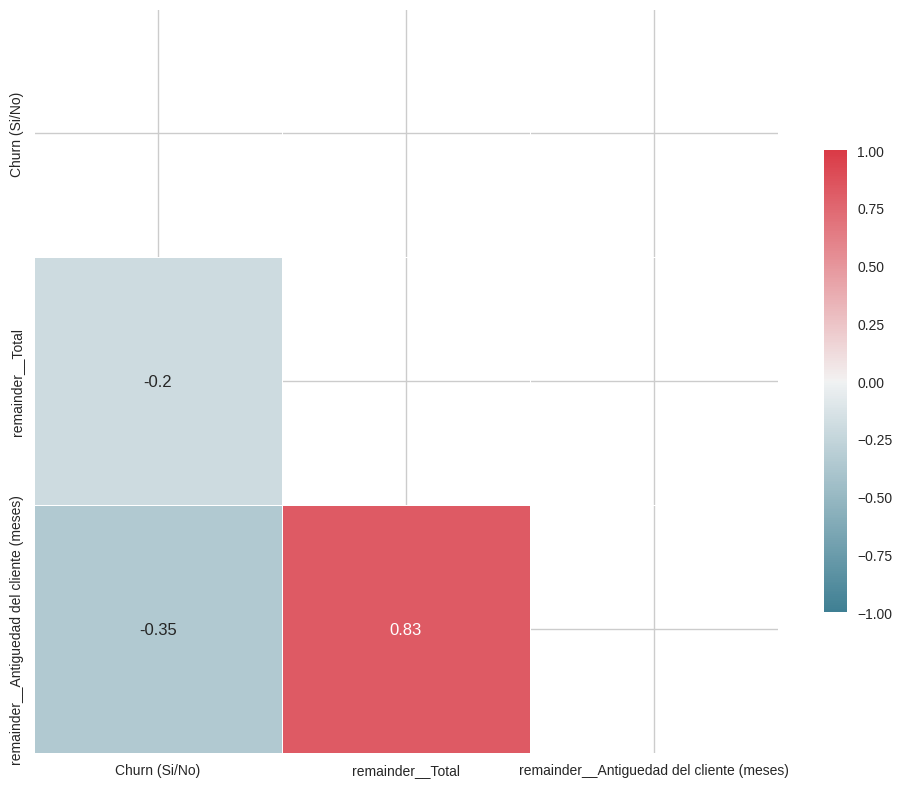

In [ ]:
# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(12, 12))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr_variables_numéricas, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

Se observa un correlación positivo entre la variable antiguedad del cliente y el valor total del servicio. A mayor valor de la variable antiguedad del cliente mayor valor del total de los servicios, es una relación fuerte.

Una correlación negativa entre la variable Churn y la antiguedad del cliente y el valor total del servicio, es una relación debil.

Es decir, a mayor valor de la variable antiguedad del cliente menor la probabilidad de Churn.
Y a mayor valor total del servicio menor la probabilidad de abandono del cliente, es una relación debil.




In [ ]:
# importando los paquetes para la visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

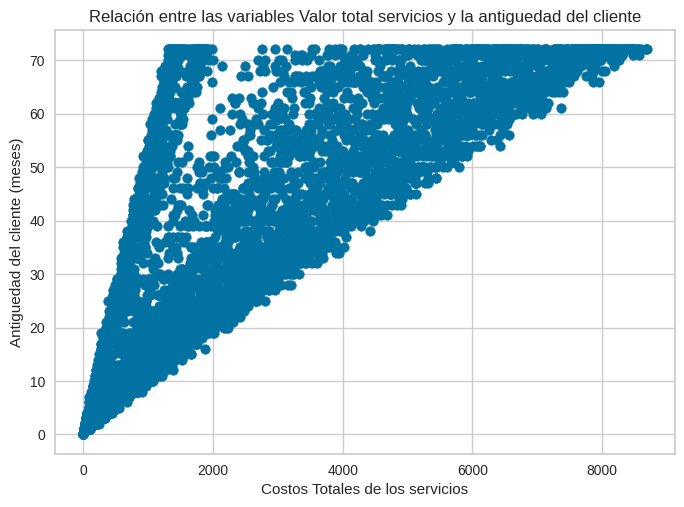

In [ ]:
# Cómo se relacionan la variable remainder__Total y la Antiguedad del cliente (meses)?
#crear gráfico de dispersión
plt.scatter(df_numericas['remainder__Total'],df_numericas['remainder__Antiguedad del cliente (meses)'])
#caracterisiticas de la gráfica
plt.title('Relación entre las variables Valor total servicios y la antiguedad del cliente')
plt.xlabel('Costos Totales de los servicios')
plt.ylabel('Antiguedad del cliente (meses)')
#mostrar gráfico
plt.show()

Se puede ver una colinealidad entre la variable antiguedad del cliente y el valor total del servicio, por lo tanto se recomienda dejar solo uno de las dos.

In [ ]:
#ver variables estadisticas
df_numericas.describe()

,Churn (Si/No),remainder__Total,remainder__Antiguedad del cliente (meses)
count,7043.000000,7043.000000,7043.000000
mean,0.265370,2279.734304,32.371149
std,0.441561,2266.794470,24.559481
min,0.000000,0.000000,0.000000
25%,0.000000,398.550000,9.000000
50%,0.000000,1394.550000,29.000000
75%,1.000000,3786.600000,55.000000
max,1.000000,8684.800000,72.000000


/tmp/ipython-input-3238690112.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn (Si/No)', y='remainder__Total', data=df_numericas, palette="Set2")


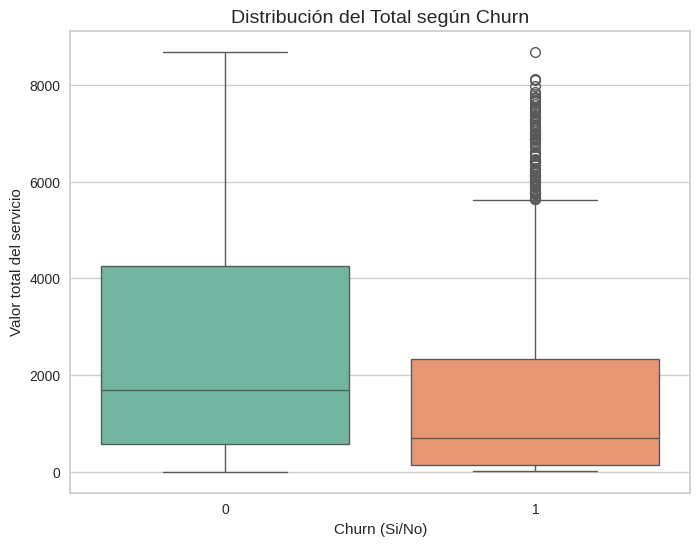

In [ ]:
#grafica las variables Churn (Si/No) y remainder__Total
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn (Si/No)', y='remainder__Total', data=df_numericas, palette="Set2")

plt.title("Distribución del Total según Churn", fontsize=14)
plt.xlabel("Churn (Si/No)")
plt.ylabel("Valor total del servicio")
plt.show()

La anterior gráfica muestra que los clientes que abandonan la empresa pagan en total por los servicios entre 100 a 2200, aproximadamente. Por otro lado, los clientes que no abandonan la empresa pagan en total por los servicios entre 600 y 4200,aproximadamente. Esto esta relacionado con la antiguedad del cliente, ya que entre más antiguo el cliente más son los gastos totales que tiene el cliente por los servicios.

/tmp/ipython-input-1092622012.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn (Si/No)', y='remainder__Antiguedad del cliente (meses)', data=df_numericas, palette="Set2")


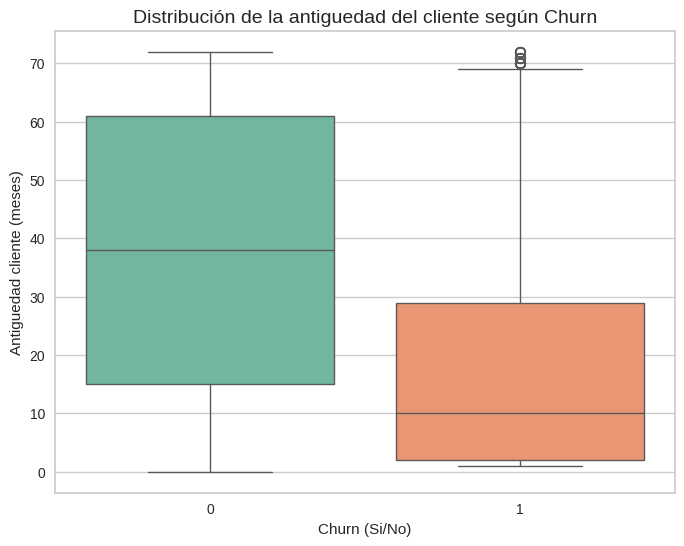

In [ ]:
#grafica las variables Churn (Si/No) y remainder__Total
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn (Si/No)', y='remainder__Antiguedad del cliente (meses)', data=df_numericas, palette="Set2")

plt.title("Distribución de la antiguedad del cliente según Churn", fontsize=14)
plt.xlabel("Churn (Si/No)")
plt.ylabel("Antiguedad cliente (meses)")
plt.show()

La anterior gráfica muestra que los clientes que abandonan la empresa tienen una antiguedad entre 1 a 29 meses. Por otro lado, los clientes que no abandonan tienen una antiguedad entre 15 y 62 meses. Los clientes más nuevos tienden a abandonar la empresa.

In [ ]:
#nueva base de datos sin variable Total

#df_telecom_definitivo = df_telecomx_variables_vif.drop(columns=['remainder__Total'],axis=1)
#df_telecom_definitivo

,onehotencoder__Genero_male,onehotencoder__Pareja(Si/No)_yes,onehotencoder__Dependientes(Si/No)_yes,onehotencoder__Suscr_Servicio_telefónico(Si/No)_yes,onehotencoder__Suscr_multiples_líneas_telefónicas(3)_yes,onehotencoder__Suscr_Servicio_internet(3)_dsl,onehotencoder__Suscr_Servicio_internet(3)_fiber optic,onehotencoder__Suscr_Adi_seguridad_en_línea(3)_yes,onehotencoder__Suscr_Adi_Respaldo_en_línea(3)_yes,onehotencoder__Suscr_Adi_Protección_del_dispositivo(3)_yes,...,onehotencoder__Contrato_month-to-month,onehotencoder__Contrato_two year,onehotencoder__Factura_en_linea(Si/No)_yes,onehotencoder__Metodo_de_pago_bank transfer automatic,onehotencoder__Metodo_de_pago_credit card automatic,onehotencoder__Metodo_de_pago_electronic check,onehotencoder__Metodo_de_pago_mailed check,remainder__Persona_mayor_65_años(Si/No),remainder__Antiguedad del cliente (meses),Churn (Si/No)
0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9.0,0
1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,1
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,13.0,1
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.0,0
7039,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,22.0,1
7040,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0
7041,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,67.0,0


In [ ]:
#antes de balancear se debe separa la variables respuesta y las variables explicativas

# importar la funcion para realizar la separación de los datos

from sklearn.model_selection import train_test_split

In [ ]:
#separación de las variables

X_modelo = df_telecomx_variables_vif.drop(columns=['Churn (Si/No)'],axis=1)
y_modelo = df_telecomx_variables_vif['Churn (Si/No)']

In [ ]:
X_modelo

,onehotencoder__Genero_male,onehotencoder__Pareja(Si/No)_yes,onehotencoder__Dependientes(Si/No)_yes,onehotencoder__Suscr_Servicio_telefónico(Si/No)_yes,onehotencoder__Suscr_multiples_líneas_telefónicas(3)_yes,onehotencoder__Suscr_Servicio_internet(3)_dsl,onehotencoder__Suscr_Servicio_internet(3)_fiber optic,onehotencoder__Suscr_Adi_seguridad_en_línea(3)_yes,onehotencoder__Suscr_Adi_Respaldo_en_línea(3)_yes,onehotencoder__Suscr_Adi_Protección_del_dispositivo(3)_yes,...,onehotencoder__Contrato_month-to-month,onehotencoder__Contrato_two year,onehotencoder__Factura_en_linea(Si/No)_yes,onehotencoder__Metodo_de_pago_bank transfer automatic,onehotencoder__Metodo_de_pago_credit card automatic,onehotencoder__Metodo_de_pago_electronic check,onehotencoder__Metodo_de_pago_mailed check,remainder__Persona_mayor_65_años(Si/No),remainder__Antiguedad del cliente (meses),remainder__Total
0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9.0,593.30
1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,542.40
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,280.85
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,13.0,1237.85
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.0,742.90
7039,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,22.0,1873.70
7040,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,92.75
7041,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,67.0,4627.65


In [ ]:
#ver datos
y_modelo

,Churn (Si/No)
0,0
1,0
2,1
3,1
4,1
...,...
7038,0
7039,1
7040,0
7041,0


#**Separación de los datos entrenamiento y prueba**

In [ ]:
#separacion de los datos en datos entrenamiento y datos de prueba
#hacer el split stratificado
X_train, X_test, y_train, y_test = train_test_split(X_modelo, y_modelo, test_size=0.2, stratify=y, random_state=42)



##**Normalización o Estandarización**

Se realizó la normalización de las variables numéricas remainder__Antiguedad del cliente (meses) y remainder__Total, para que tengan la misma escala.

In [ ]:
# se deben normalizar las variables para que todas tengan la misma importancia en el modelo a utilizar
#se importa la funcion para realizar la normalización

from sklearn.preprocessing import StandardScaler

In [ ]:
# guardar la funcion en una variable

normalizacion = StandardScaler()

#Aplicar la normalizacion en los datos de X_train, variables explicativas

X_train_normalizado = normalizacion.fit_transform(X_train)

In [ ]:
# crear un Dataframe con los valores entrenamiento normalizados

pd.DataFrame(X_train_normalizado)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-1.016104,1.043175,-0.660136,0.321907,1.171414,-0.722982,1.122465,1.580255,1.372877,-0.721559,...,0.905735,-0.564368,0.821154,-0.532875,1.907102,-0.706824,-0.546585,-0.438325,1.124891,1.398565
1,0.984151,-0.958612,1.514839,0.321907,-0.853669,-0.722982,-0.890896,-0.632809,-0.728397,-0.721559,...,-1.104076,1.771893,-1.217798,1.876611,-0.524356,-0.706824,-0.546585,-0.438325,-0.827880,-0.913119
2,-1.016104,-0.958612,-0.660136,0.321907,-0.853669,-0.722982,1.122465,1.580255,-0.728397,1.385888,...,0.905735,-0.564368,0.821154,-0.532875,-0.524356,1.414779,-0.546585,-0.438325,-1.234707,-0.946146
3,0.984151,1.043175,1.514839,0.321907,-0.853669,1.383161,-0.890896,1.580255,-0.728397,1.385888,...,-1.104076,-0.564368,-1.217798,-0.532875,1.907102,-0.706824,-0.546585,-0.438325,0.026457,0.071090
4,-1.016104,-0.958612,1.514839,0.321907,1.171414,-0.722982,1.122465,1.580255,-0.728397,-0.721559,...,0.905735,-0.564368,0.821154,-0.532875,-0.524356,-0.706824,1.829542,-0.438325,-0.746514,-0.495126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,-1.016104,1.043175,1.514839,0.321907,-0.853669,-0.722982,-0.890896,-0.632809,-0.728397,-0.721559,...,-1.104076,-0.564368,-1.217798,1.876611,-0.524356,-0.706824,-0.546585,-0.438325,-0.421052,-0.807693
5630,-1.016104,1.043175,1.514839,0.321907,1.171414,-0.722982,1.122465,-0.632809,-0.728397,-0.721559,...,0.905735,-0.564368,0.821154,-0.532875,-0.524356,1.414779,-0.546585,-0.438325,0.392602,0.832195
5631,0.984151,-0.958612,-0.660136,0.321907,1.171414,-0.722982,1.122465,-0.632809,-0.728397,-0.721559,...,0.905735,-0.564368,0.821154,-0.532875,-0.524356,1.414779,-0.546585,-0.438325,-0.502418,-0.244594
5632,-1.016104,1.043175,1.514839,0.321907,1.171414,-0.722982,-0.890896,-0.632809,-0.728397,-0.721559,...,-1.104076,1.771893,-1.217798,-0.532875,-0.524356,-0.706824,1.829542,-0.438325,-0.339687,-0.755255


# **Modelado Predictivo**

##**Modelo Baseline con datos desbalanceados**

### **Dummie Classifier**

In [ ]:
# importar herramienta para crear el modelo de referencia
# dicho modelo se realiza con Dummie Classifier

from sklearn.dummy import DummyClassifier

In [ ]:
# guardar en una variable la funcion DummyClassifier

dummy = DummyClassifier()

#entrenar y ajustar el modelo con los datos de entrenamiento

dummy.fit(X_train,y_train)


DummyClassifier()

In [ ]:
#probar el modelo con los datos de prueba y ver su puntaje

dummy.score(X_test,y_test)

0.7345635202271115

###**Arbol de decisión**

In [ ]:
# importar la herramienta para realizar el modelo de arbol de decisión

from sklearn.tree import DecisionTreeClassifier

In [ ]:
# crear variable que va almacenar la función

modelo_arbol = DecisionTreeClassifier(random_state=42)
# se establece el valor random_state para que siempre sea el mismo calculo aleatorio
modelo_arbol

DecisionTreeClassifier(random_state=42)

In [ ]:
#se ajusta y aplica el modelo de acuerdo a los datos de entrenamiento

modelo_arbol.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
#ver el puntaje del modelo con los datos de prueba
modelo_arbol.score(X_test,y_test)

0.71611071682044

###**RandomForestClassifiert**

In [ ]:
# importar metodo RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier


In [ ]:
# crear variable para almacenar el modelo RandomForestClassifier

modelo_random_forest = RandomForestClassifier(n_estimators=60,max_depth=10,random_state=42)

modelo_random_forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=60, random_state=42)

In [ ]:
#ver el puntaje del modelo con los datos de prueba
modelo_random_forest.score(X_test,y_test)

0.7892122072391767

###**KNN**

In [ ]:
# importar libreria o funcion con l opcion para crear modelo KNN

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# instanciar guardar funcion en una variable

knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Aplicar el modelo knn con los datos de entrenamiento normalizados

knn.fit(X_train_normalizado,y_train)

KNeighborsClassifier()

In [ ]:
#probar el modelo con los datos prueba normalizados

#normalizar los datos X_test

X_test_normalizado = normalizacion.transform(X_test)

In [ ]:
#probar el modelo con los datos prueba normalizados
# calcular la tasa de acierto

knn.score(X_test_normalizado,y_test)

0.772888573456352

In [ ]:
# se va a realizar una comparacion de la tasa de acierto de los modelos

# primero crear lista de tuplas datos (nombre,modelo, modelo,X_test)

lista = [('dummy',dummy,X_test),('árbol',modelo_arbol,X_test),('RandomForest',modelo_random_forest,X_test),('knn',knn,X_test_normalizado)]

# se hace un for para mostrar los resultados

for i in lista:
  print(f'La exactitud del modelo {i[0]}: {i[1].score(i[2],y_test)}')

La exactitud del modelo dummy: 0.7345635202271115
La exactitud del modelo árbol: 0.71611071682044
La exactitud del modelo RandomForest: 0.7892122072391767
La exactitud del modelo knn: 0.772888573456352


De acuerdo al puntaje de exactitud el mejor modelo es el RandomForest.

## **Evaluar los modelos baseline con las metricas**

### **Dummie Classifier**

In [ ]:
#evaluar el modelo con las metricas
#Metricas como error medio cuadratico, error medio absoluto y coeficiente de determinación
#importar las librerias a aplicar

from sklearn.metrics import roc_auc_score,classification_report


In [ ]:
#aplicar el modelo con los datos de prueba para obtener los datos previstos

y_previstos_dummy = dummy.predict(X_test)
y_previstos_dummy

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#calcular el puntaje area bajo la curva ROC
print(f'Puntaje bajo la curva ROC - Dummy: {roc_auc_score(y_test, y_previstos_dummy)}')


Puntaje bajo la curva ROC - Dummy: 0.5


In [ ]:
#mostrar el informe de las metricas
print(classification_report(y_test, y_previstos_dummy, digits=3))

              precision    recall  f1-score   support

           0      0.735     1.000     0.847      1035
           1      0.000     0.000     0.000       374

    accuracy                          0.735      1409
   macro avg      0.367     0.500     0.423      1409
weighted avg      0.540     0.735     0.622      1409



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Interpretación

Clase 0 (No Churn)

El modelo siempre predice “No” → por eso el recall = 1.0 (captura todos los "No").

La precisión es 0.735 porque el 73.5% de los datos son realmente “No”.

El f1-score es alto (0.847), pero solo porque la clase mayoritaria domina.

Clase 1 (Sí Churn)

Precision, recall y f1-score = 0.0 → el modelo nunca detecta clientes que cancelan.

Es el reflejo del desbalance de clases (73.5% vs 26.5%).

Accuracy (0.735)

Parece alto, pero es engañoso. El modelo se limita a predecir siempre la clase mayoritaria (No Churn) y por eso acierta el 73.5%.

No aporta valor real.

Macro avg (promedio simple entre clases)

Precision = 0.367, Recall = 0.500, F1 = 0.423

Esto refleja que el modelo solo sirve para la clase mayoritaria.

Weighted avg (promedio ponderado por soporte)

Como hay más "No", este promedio está sesgado hacia la clase 0.

Se ve mejor de lo que realmente es.

###**Arbol de decisión**

In [ ]:
#aplicar el modelo con los datos de prueba para obtener los datos previstos

y_previstos_arbol = modelo_arbol.predict(X_test)
y_previstos_arbol

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
#calcular el puntaje area bajo la curva ROC
print(f'Puntaje bajo la curva ROC - Dummy: {roc_auc_score(y_test, y_previstos_arbol)}')

Puntaje bajo la curva ROC - Dummy: 0.6419786096256686


In [ ]:
#mostrar el informe de las metricas
print(classification_report(y_test, y_previstos_arbol, digits=3))

              precision    recall  f1-score   support

           0      0.811     0.800     0.805      1035
           1      0.466     0.484     0.475       374

    accuracy                          0.716      1409
   macro avg      0.639     0.642     0.640      1409
weighted avg      0.720     0.716     0.718      1409



Interpretación

* Clase 0 (No Churn)

Muy buen desempeño: precision (81.1%) y recall (80%).

El modelo distingue bien a los clientes que no cancelan.

* Clase 1 (Sí Churn)

Precision = 46.6% → casi la mitad de los clientes detectados como “sí cancelan” son falsos positivos.

Recall = 48.4% → logra detectar casi la mitad de los que sí cancelan.

Mucho mejor que Dummy y KNN, pero un poco más débil que RandomForest.

* Accuracy (71.6%)

Menor que Dummy (73.5%) y que RandomForest (78.9%).

Sin embargo, a diferencia del Dummy y KNN, aquí sí se logra capturar churners.

###**RandomForestClassifier**

In [ ]:
#aplicar el modelo con los datos de prueba para obtener los datos previstos

y_previstos_randomForest = modelo_random_forest.predict(X_test)
y_previstos_randomForest

array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
#calcular el puntaje area bajo la curva ROC
print(f'Puntaje bajo la curva ROC - Dummy: {roc_auc_score(y_test, y_previstos_randomForest)}')

Puntaje bajo la curva ROC - Dummy: 0.6925908703402309


In [ ]:
#mostrar el informe de las metricas
print(classification_report(y_test, y_previstos_randomForest, digits=3))

              precision    recall  f1-score   support

           0      0.829     0.899     0.862      1035
           1      0.634     0.487     0.551       374

    accuracy                          0.789      1409
   macro avg      0.732     0.693     0.706      1409
weighted avg      0.777     0.789     0.780      1409



Interpretación

Clase 0 (No Churn)

Precision = 0.829 → el 82.9% de los clientes predichos como “No cancelan” realmente no cancelan.

Recall = 0.899 → captura el 89.9% de los clientes que realmente no cancelan.

Muy buen desempeño para la clase mayoritaria.

Clase 1 (Sí Churn)

Precision = 0.634 → cuando el modelo dice “Sí cancela”, acierta el 63.4% de las veces.

Recall = 0.487 → solo detecta el 48.7% de los clientes que cancelan.

F1 = 0.551 → es bajo, pero ya muchísimo mejor que el DummyClassifier (0.0 en churn=1).

Comparación con DummyClassifier

Dummy nunca detectaba la clase 1 (recall=0, f1=0).

RandomForest sí detecta clientes que cancelan, aunque le falta mejorar recall.

Accuracy subió de 0.735 → 0.789, pero lo más importante es que ya hay valor predictivo para Churn=1.

###**KNN**

In [ ]:
#aplicar el modelo con los datos de prueba para obtener los datos previstos

y_previstos_KNN = knn.predict(X_test)
y_previstos_KNN

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#calcular el puntaje area bajo la curva ROC
print(f'Puntaje bajo la curva ROC - Dummy: {roc_auc_score(y_test, y_previstos_KNN)}')

Puntaje bajo la curva ROC - Dummy: 0.5


In [ ]:
#mostrar el informe de las metricas
print(classification_report(y_test, y_previstos_KNN, digits=3))

              precision    recall  f1-score   support

           0      0.735     1.000     0.847      1035
           1      0.000     0.000     0.000       374

    accuracy                          0.735      1409
   macro avg      0.367     0.500     0.423      1409
weighted avg      0.540     0.735     0.622      1409



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Interpretación

Clase 0 (No Churn)

Precision = 0.735 → el 73.5% de los predichos como “No” realmente no cancelan.

Recall = 1.000 → detectó absolutamente todos los clientes que no cancelan.

Es decir: el modelo aprendió solo a reconocer la clase mayoritaria.

Clase 1 (Sí Churn)

Precision = 0.0, Recall = 0.0, F1 = 0.0

KNN no logra identificar ningún cliente que cancela.

Se comporta igual que el DummyClassifier más básico (que siempre predice “No”).

Accuracy engañosa

Aunque el accuracy (73.5%) parece aceptable, en realidad el modelo es inútil para el negocio porque nunca detecta cancelaciones.

Es un ejemplo típico de lo que ocurre en datasets desbalanceados: accuracy alto, pero mala detección de la clase minoritaria.

El mejor modelo de acuerdo a lo anterior es el modelo Random Forest

##**Balanceo de los datos**

In [ ]:
# se va a usar la herramienta OVERSAMPLING PARA CREAR datos aleatorios sinteticos para balancear los datos
#importar la libreria a lugar

from imblearn.over_sampling import SMOTE

**AL HACER EL BALANCEO SOLO SE HACE CON LOS DATOS DE ENTRENAMIENTO**

In [ ]:
# se realizara el balanceo con el metodo SMOTE, sobremuestreo (oversampling) moderado es decir se adicionaran datos sinteticos a la clase con menos datos
#en donde la base alcanzara un balanceo en donde Churn Si tendra datos 45% aproximadamente y Churn NO de 55%.
#crear variable para almacenar la funcion
# Ratio objetivo: 35% minoría
#sampling_strategy = 0.45/0.55 = 0.8181 relacion porcentaje minoria/porcentaje mayoria
radio_objetivo = 0.81
oversampling = SMOTE(sampling_strategy=radio_objetivo, random_state=42)

#crear los datos balanceados para X y Y, los datos se balancean solo con los datos de entrenamiento
X_train_balanceada, y_train_balanceada = oversampling.fit_resample(X_train,y_train)


In [ ]:
#ver la proporción de como quedaron los datos
y_train_balanceada.value_counts(normalize=True)
#los datos se encuentran 45 y 55, cabe destacar los datos morosos son sinteticos

,proportion
Churn (Si/No),
0,0.55253
1,0.44747


In [ ]:
#ver la cantidad de los datos por clase
y_train_balanceada.value_counts()

,count
Churn (Si/No),
0,4139
1,3352


In [ ]:
print("Antes SMOTE:", y_train.value_counts(normalize=True))
print("Después SMOTE:", y_train_balanceada.value_counts(normalize=True))

Antes SMOTE: Churn (Si/No)
0    0.734647
1    0.265353
Name: proportion, dtype: float64
Después SMOTE: Churn (Si/No)
0    0.55253
1    0.44747
Name: proportion, dtype: float64


##**Modelos Predictivos**

### **Dummie Classifier**

In [ ]:
# =============================
# Modelo Dummie Classifier entrenado con datos balanceados
# =============================
modelo_dummy_entrenamiento = DummyClassifier()
modelo_dummy_entrenamiento.fit(X_train_balanceada,y_train_balanceada)
#predecir valores
y_pred_dummy = modelo_dummy_entrenamiento.predict(X_test)
#mostrar resultados metricas
print("\n=== Dummie Classifier (Balanceado con SMOTE) ===")
print(classification_report(y_test, y_pred_dummy, digits=3))
print("ROC AUC:", roc_auc_score(y_test, y_pred_dummy))


=== Dummie Classifier (Balanceado con SMOTE) ===
              precision    recall  f1-score   support

           0      0.735     1.000     0.847      1035
           1      0.000     0.000     0.000       374

    accuracy                          0.735      1409
   macro avg      0.367     0.500     0.423      1409
weighted avg      0.540     0.735     0.622      1409

ROC AUC: 0.5


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


###**Arbol de decisión**

In [ ]:
#Entrenamiento con el modelo Arbol de decision
modelo_arbol_entrenamiento = DecisionTreeClassifier(random_state=42)
#ENTRENAR MODELO
modelo_arbol_entrenamiento.fit(X_train_balanceada,y_train_balanceada)
#predecir valores
y_pred_arbol = modelo_arbol_entrenamiento.predict(X_test)
#mostrar resultados metricas

print("\n=== Arbol de decisión (Balanceado con SMOTE) ===")
print(classification_report(y_test, y_pred_arbol, digits=3))
print("ROC AUC:", roc_auc_score(y_test, y_pred_arbol))


=== Arbol de decisión (Balanceado con SMOTE) ===
              precision    recall  f1-score   support

           0      0.821     0.814     0.817      1035
           1      0.497     0.511     0.504       374

    accuracy                          0.733      1409
   macro avg      0.659     0.662     0.661      1409
weighted avg      0.735     0.733     0.734      1409

ROC AUC: 0.6621108786070423


###**RandomForestClassifier**

In [ ]:
# =============================
# Modelo RandomForest entrenado con datos balanceados
# =============================
rf_train = RandomForestClassifier(n_estimators=60,max_depth=10,random_state=42)
#entrenamiento modelo
rf_train.fit(X_train_balanceada, y_train_balanceada)
#predecir valores
y_pred_rf = rf_train.predict(X_test)

print("\n=== RandomForestClassifier (Balanceado con SMOTE) ===")
print(classification_report(y_test, y_pred_rf, digits=3))
print("ROC AUC:", roc_auc_score(y_test, y_pred_rf))


=== RandomForestClassifier (Balanceado con SMOTE) ===
              precision    recall  f1-score   support

           0      0.853     0.856     0.854      1035
           1      0.597     0.591     0.594       374

    accuracy                          0.786      1409
   macro avg      0.725     0.723     0.724      1409
weighted avg      0.785     0.786     0.785      1409

ROC AUC: 0.7234738691260431


###**KNN**

In [ ]:
# KNN
metodo_escalar = StandardScaler()
#escalar los datos de X balanceados entrenamiento
X_train_balanceada_escalada = metodo_escalar.fit_transform(X_train_balanceada)
#escalar los datos de X balanceados prueba
X_test_escalada = metodo_escalar.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
#entrenar modelo
knn.fit(X_train_balanceada_escalada, y_train_balanceada)
#pedecir valores y con x prueba
y_pred_knn = knn.predict(X_test_escalada)

print("\n=== KNN (Balanceado con SMOTE) ===")
print(classification_report(y_test, y_pred_knn))


=== KNN (Balanceado con SMOTE) ===
              precision    recall  f1-score   support

           0       0.87      0.73      0.79      1035
           1       0.48      0.70      0.57       374

    accuracy                           0.72      1409
   macro avg       0.68      0.71      0.68      1409
weighted avg       0.77      0.72      0.73      1409



###**LogisticRegression**

In [ ]:
#importar libreria
from sklearn.linear_model import LogisticRegression

In [ ]:
# Modelo Regresión Logística
logreg = LogisticRegression(max_iter=10000, random_state=42)

#entrenar modelo con datos balanceados
logreg.fit(X_train_balanceada_escalada, y_train_balanceada)

#predecir valores
y_pred_lr = logreg.predict(X_test_escalada)
#mostrar resultados
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))

Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1035
           1       0.54      0.75      0.63       374

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409



**Análisis métricas:**

* **Precisión:**
Proporción total de predicciones correctas.

Valores altos en RandomForestClassifier (0:0.85,1:0.59) y Logistic Regression (1:0.54,0:0.90)

* **Recall:**
De los predichos como positivos, cuántos son realmente positivos.

Valor alto en Logistic Regression (1:0.75, 0:0.77) y knn (1:0.70, 0: 0.73)

* **F1-score:**
Balance entre precisión y recall

Valor alto en Logistic Regression (1:0.63)

* **Accuracy:**
Proporción total de predicciones correctas
Valor más alto en RandomForestClassifier 0.78

Se escogera los mejores modelos de acuerdo a las métricas accuracy y precision como lo son RandomForestClassifier y Logistic Regression

##**Evaluación y Validación modelo**

###**RandomForestClassifier**

####**Métricas de clasificación**

In [ ]:
#importar libreria

from imblearn.pipeline import Pipeline
from sklearn.metrics import make_scorer,recall_score, f1_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [ ]:
# se realizara el balanceo con el metodo SMOTE, sobremuestreo (oversampling) moderado es decir se adicionaran datos sinteticos a la clase con menos datos
#en donde la base alcanzara un balanceo en donde Churn Si tendra datos 35% aproximadamente y Churn NO de 65%.

# Ratio objetivo: 35% minoría
#sampling_strategy = 0.45/0.55 = 0.8181 relacion porcentaje minoria/porcentaje mayoria
radio_objetivo = 0.81

# Definir pipeline: balanceo + modelo
pipeline_RF = Pipeline([
    ('smote', SMOTE(sampling_strategy=radio_objetivo, random_state=42)),  # sobremuestreo moderado
    ('rf', RandomForestClassifier(n_estimators=60,max_depth=10,random_state=42))
])


In [ ]:
# Se establece la Validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Calcular las Métricas del modelo RandomForestClassifier
recall_RF = cross_val_score(pipeline_RF, X_train, y_train, cv=cv, scoring=make_scorer(recall_score))
f1_RF = cross_val_score(pipeline_RF, X_train, y_train, cv=cv, scoring=make_scorer(f1_score))
roc_auc_RF = cross_val_score(pipeline_RF, X_train, y_train, cv=cv, scoring="roc_auc")
sensibilidad_RF = cross_val_score(pipeline_RF, X_train, y_train, cv=cv, scoring="accuracy")
precision_RF = cross_val_score(pipeline_RF, X_train, y_train, cv=cv, scoring="precision")

print("Recall(sensibilidad) medio:", np.mean(recall_RF))
print("F1 medio:", np.mean(f1_RF))
print("ROC-AUC medio:", np.mean(roc_auc_RF))
print("Accuracy o exactitud:", np.mean(sensibilidad_RF))
print("Precisión:", np.mean(precision_RF))

Recall(sensibilidad) medio: 0.5953177257525084
F1 medio: 0.6074370238066026
ROC-AUC medio: 0.8428759439365565
Accuracy o exactitud: 0.7957007159957195
Precisión: 0.6204956866594671


###**LogisticRegression**

####**Métricas de clasificación**

In [ ]:
# se realizara el balanceo con el metodo SMOTE, sobremuestreo (oversampling) moderado es decir se adicionaran datos sinteticos a la clase con menos datos
#en donde la base alcanzara un balanceo en donde Churn Si tendra datos 35% aproximadamente y Churn NO de 65%.

# Ratio objetivo: 35% minoría
#sampling_strategy = 0.45/0.55 = 0.8181 relacion porcentaje minoria/porcentaje mayoria
radio_objetivo = 0.81

# Definir pipeline: balanceo + modelo
pipeline_LR = Pipeline([
    ('smote', SMOTE(sampling_strategy=radio_objetivo, random_state=42)),  # sobremuestreo moderado
    ('lr',LogisticRegression(max_iter=10000, random_state=42))
])

In [ ]:
# Se establece la Validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Calcular las Métricas del modelo LogisticRegression
recall_LR = cross_val_score(pipeline_LR, X_train, y_train, cv=cv, scoring=make_scorer(recall_score))
f1_LR = cross_val_score(pipeline_LR, X_train, y_train, cv=cv, scoring=make_scorer(f1_score))
roc_auc_LR = cross_val_score(pipeline_LR, X_train, y_train, cv=cv, scoring="roc_auc")
sensibilidad_LR = cross_val_score(pipeline_LR, X_train, y_train, cv=cv, scoring="accuracy")
precision_LR = cross_val_score(pipeline_LR, X_train, y_train, cv=cv, scoring="precision")

print("Recall (sensibilidad) medio:", np.mean(recall_LR))
print("F1 medio:", np.mean(f1_LR))
print("ROC-AUC medio:", np.mean(roc_auc_LR))
print("Accuracy o exactitud:", np.mean(sensibilidad_LR))
print("Precisión:", np.mean(precision_LR))

Recall (sensibilidad) medio: 0.7464882943143812
F1 medio: 0.6274149156065237
ROC-AUC medio: 0.844155434923762
Accuracy o exactitud: 0.7646399296455011
Precisión: 0.5413317193861469


###**Comparar modelos predictivos**

📌 Lo más importante es detectar a los clientes que cancelan (Churn=1) → Escogemos el modelo con mayor Recall.

In [ ]:
#crear dataframe con resultados

metricas_resultados = pd.DataFrame({
                      'Modelo': ['RandomForestClassifier', 'LogisticRegression'],
                      'Recall': [np.mean(recall_RF), np.mean(recall_LR)],
                      'F1': [np.mean(f1_RF), np.mean(f1_LR)],
                      'ROC-AUC': [np.mean(roc_auc_RF), np.mean(roc_auc_LR)],
                      'Accuracy': [np.mean(sensibilidad_RF), np.mean(sensibilidad_LR)],
                      'Precisión':[np.mean(precision_RF),np.mean(precision_LR)]
                    })
metricas_resultados

,Modelo,Recall,F1,ROC-AUC,Accuracy,Precisión
0,RandomForestClassifier,0.595318,0.607437,0.842876,0.795701,0.620496
1,LogisticRegression,0.746488,0.627415,0.844155,0.764640,0.541332


Teniendo en cuenta los valores de recall (Sensibilidad) el que obtuvo un mayor valor fue el modelo **LogisticRegression.**

##**Ajuste de Hiperparámetros**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Modelo base
log_reg_base = LogisticRegression(solver="liblinear", class_weight="balanced")

# Definir grilla de hiperparámetros
param_grid = {
    "penalty": ["l1", "l2"],   # tipo de regularización
    "C": [0.01, 0.1, 1, 10, 100]  # fuerza de regularización
}

grid_search = GridSearchCV(
    estimator=log_reg_base,  #nombre modelo a optmizar
    param_grid=param_grid,   #parametros que se quieren evaluar
    scoring="recall",        #Se optimiza para maximizar el recall
    cv=5,                    #No. de visiones en la validación cruzada
    n_jobs=-1,               # Usa todos los núcleos del CPU
    verbose=2                # Muestra detalles del proceso
)

grid_search.fit(X_train_balanceada_escalada, y_train_balanceada)

print("Mejores parámetros:", grid_search.best_params_)
print("Mejor recall en CV:", grid_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores parámetros: {'C': 0.01, 'penalty': 'l1'}
Mejor recall en CV: 0.837706697510955


In [ ]:
#guardar el mejor modelo

mejor_modelo_LR = grid_search.best_estimator_
mejor_modelo_LR

LogisticRegression(C=0.01, class_weight='balanced', penalty='l1',
                   solver='liblinear')

##**Probar el modelo**

###**LogisticRegression**

In [ ]:
#predecir los valores de y con el MEJOR MODELO modelo escogido y los valores de X prueba balanceado

#entrenar modelo
mejor_modelo_LR.fit(X_train_balanceada_escalada, y_train_balanceada)

LogisticRegression(C=0.01, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [ ]:
#hacer la prediccion de los datos con el modelo entrenado y con los datos NO VISTOS
y_previsto_probar = mejor_modelo_LR.predict(X_test_escalada)
#MOSTRAR resultados del informe de resultados metricas del modelo
print(classification_report(y_test,y_previsto_probar))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.50      0.79      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



In [ ]:
#CALCULAR EL Y PARA ROC AUC
y_prueba = mejor_modelo_LR.predict_proba(X_test_escalada)[:,1]  # # Probabilidades (para métricas como AUC
y_prueba

array([0.5058625 , 0.89213783, 0.82579322, ..., 0.72096845, 0.22516804,
       0.53707121])

In [ ]:
#calcular las metricas del mejor modelo
from sklearn.metrics import confusion_matrix

# Reporte de métricas
print(classification_report(y_test, y_previsto_probar, digits=3))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prueba)
print("ROC-AUC:", roc_auc)


              precision    recall  f1-score   support

           0      0.904     0.716     0.799      1035
           1      0.501     0.789     0.613       374

    accuracy                          0.735      1409
   macro avg      0.702     0.752     0.706      1409
weighted avg      0.797     0.735     0.749      1409

ROC-AUC: 0.8375377819111833
Confusion Matrix:
[[741 294]
 [ 79 295]]


Accuracy (0.735): El modelo acierta el 73.5% de las predicciones totales.

* Clase 1 (Churn = "Sí abandonó"):

Recall = 78.9%: El modelo identifica correctamente al 78.9% de los clientes que realmente se van.

Ventaja: Capturas la mayoría de los casos críticos.

Riesgo: Un 21.1% de falsos negativos (clientes que se irán pero el modelo no detecta).

Precisión = 50.1%: De los clientes que el modelo predice como "propensos a churn", solo la mitad realmente se irán.

Problema: Muchas campañas de retención se gastarán en clientes que no tenían riesgo real.

* Clase 0 (No Churn):

Precisión = 90.4%: Cuando el modelo dice "no hay riesgo", suele acertar.

Recall = 71.6%: El 28.4% de falsos positivos son clientes etiquetados como "no churn" pero que sí se irán.


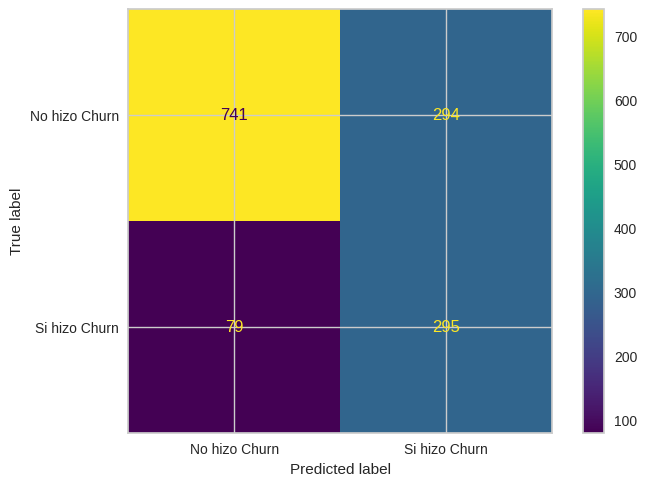

In [ ]:
# se desea dibujar la matriz de cnfusion
#se debe importar la herramienta ConfusionMatrixDisplay

from sklearn.metrics import ConfusionMatrixDisplay

#calcular la matriz de confusión
matriz_confusion_mejor_modelo_LR = ConfusionMatrixDisplay.from_predictions(y_test, y_previsto_probar,display_labels=['No hizo Churn','Si hizo Churn']) #. label[0,1]


**Análisis Matriz de Confusión:**

* El modelo predijo que 741 usuario NO abandonaron la empresa y eso es verdad.

* Por otro lado, el modelo predijo que 79 clientes NO abandonaron la empresa pero en realidad si lo hicieron.

* El modelo predijo que 295 clientes abandonaron la empresa o hicieron Churn y en verdad si lo hicieron.

* El modelo predijo que 294 usuarios abandonaron la empresa o hicieron Churn y en realidad NO lo hicieron.

FP altos (294): Muchos "0" erroneamente clasificados como "1".

FN bajos (79): Pocos "1" erroneamente clasificados como "0".

🔹 Métricas clave para Churn

Como queremos predecir cancelación de clientes (Churn=1), las métricas más útiles son:

* Recall (Sensibilidad):
% de clientes que realmente cancelaron y el modelo sí detectó.
👉 Muy importante en churn, porque queremos detectar la fuga.

* Precision:
% de clientes que el modelo predijo como cancelados y realmente lo eran.
👉 Útil si actuar sobre un cliente cuesta dinero (ej. campaña de retención).

* F1-score:
Equilibrio entre precision y recall.
👉 Buena métrica cuando hay desbalance.

* ROC AUC:
Qué tan bien el modelo distingue entre clientes que cancelan y los que no.
👉 Resume la calidad general del modelo (0.5 = azar, 1.0 = perfecto).

* Balanced Accuracy:
Accuracy ajustado para clases desbalanceadas.

##**Ver las variables más importantes - Feature importances**

/usr/local/lib/python3.11/dist-packages/yellowbrick/model_selection/importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


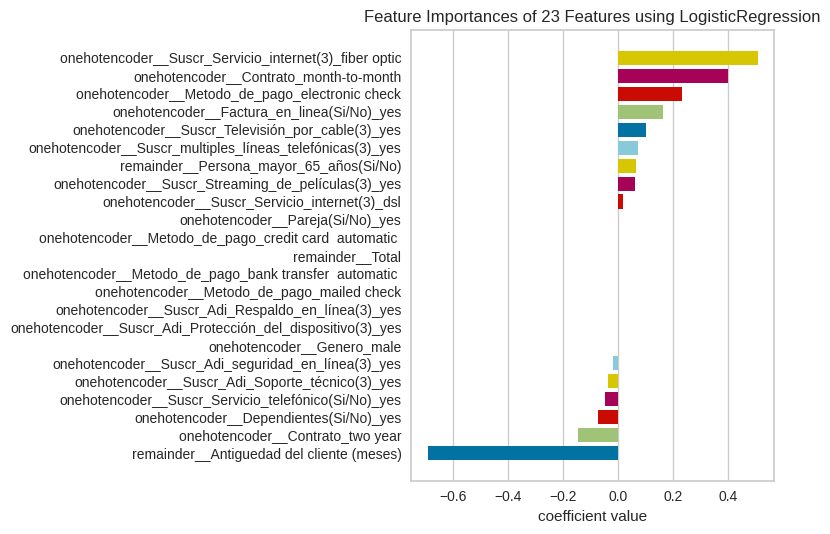

<Axes: title={'center': 'Feature Importances of 23 Features using LogisticRegression'}, xlabel='coefficient value'>

In [ ]:
from yellowbrick.model_selection import FeatureImportances

grafica = FeatureImportances(mejor_modelo_LR, relative=False)
grafica.fit(X_train, y_train)
grafica.show()

###**Coeficientes de la Regresión Logística**

In [ ]:
# Obtener coeficientes y crear DataFrame
coeficientes = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": mejor_modelo_LR.coef_[0]  # best_model es tu LogisticRegression
})

# Ordenar por magnitud absoluta (importancia)
coeficientes["Magnitud"] = coeficientes["Coeficiente"].abs()
coeficientes = coeficientes.sort_values("Magnitud", ascending=False)

print(coeficientes)


                                             Variable  Coeficiente  Magnitud
21          remainder__Antiguedad del cliente (meses)    -0.693315  0.693315
6   onehotencoder__Suscr_Servicio_internet(3)_fibe...     0.507844  0.507844
13             onehotencoder__Contrato_month-to-month     0.401426  0.401426
18     onehotencoder__Metodo_de_pago_electronic check     0.231392  0.231392
15         onehotencoder__Factura_en_linea(Si/No)_yes     0.163665  0.163665
14                   onehotencoder__Contrato_two year    -0.146122  0.146122
11   onehotencoder__Suscr_Televisión_por_cable(3)_yes     0.101273  0.101273
4   onehotencoder__Suscr_multiples_líneas_telefóni...     0.073964  0.073964
2              onehotencoder__Dependientes(Si/No)_yes    -0.072231  0.072231
20            remainder__Persona_mayor_65_años(Si/No)     0.065531  0.065531
12  onehotencoder__Suscr_Streaming_de_películas(3)...     0.060253  0.060253
3   onehotencoder__Suscr_Servicio_telefónico(Si/No...    -0.046522  0.046522

Coeficiente positivo: Aumenta la probabilidad de churn.

Coeficiente negativo: Reduce la probabilidad de churn.

Magnitud absoluta: Indica importancia relativa.

Las variables que aumentan la probabilidad de NO Churn son:

Antiguedad del cliente (meses)

Contrato_two year

Dependientes(Si/No)_yes

Suscr_Servicio_telefónico(Si/No)

Suscr_Adi_Soporte_técnico(3)

Suscr_Adi_seguridad_en_línea(3)



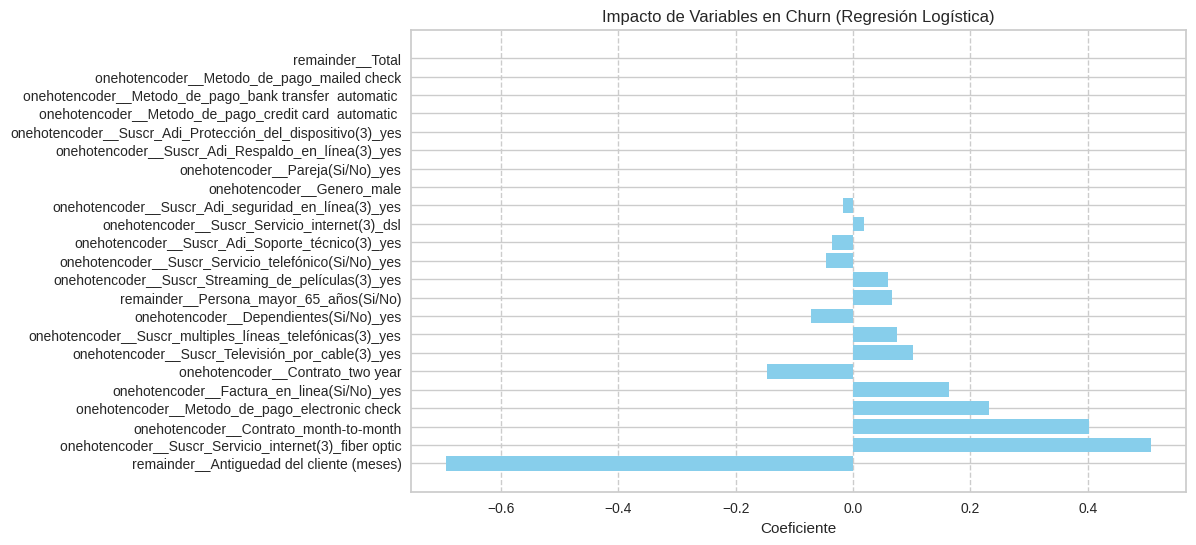

In [ ]:
#grafica de los coeficientes calculados anteriormente
plt.figure(figsize=(10, 6))
plt.barh(coeficientes["Variable"], coeficientes["Coeficiente"], color="skyblue")
plt.title("Impacto de Variables en Churn (Regresión Logística)")
plt.xlabel("Coeficiente")
plt.grid(axis="x", linestyle="--")
plt.show()

###**Odds Ratios (Para Explicabilidad No Técnica)**

In [ ]:
coeficientes["Odds_Ratio"] = np.exp(coeficientes["Coeficiente"])
print(coeficientes[["Variable", "Odds_Ratio"]])

                                             Variable  Odds_Ratio
21          remainder__Antiguedad del cliente (meses)    0.499916
6   onehotencoder__Suscr_Servicio_internet(3)_fibe...    1.661704
13             onehotencoder__Contrato_month-to-month    1.493953
18     onehotencoder__Metodo_de_pago_electronic check    1.260353
15         onehotencoder__Factura_en_linea(Si/No)_yes    1.177820
14                   onehotencoder__Contrato_two year    0.864052
11   onehotencoder__Suscr_Televisión_por_cable(3)_yes    1.106578
4   onehotencoder__Suscr_multiples_líneas_telefóni...    1.076768
2              onehotencoder__Dependientes(Si/No)_yes    0.930316
20            remainder__Persona_mayor_65_años(Si/No)    1.067726
12  onehotencoder__Suscr_Streaming_de_películas(3)...    1.062105
3   onehotencoder__Suscr_Servicio_telefónico(Si/No...    0.954543
10    onehotencoder__Suscr_Adi_Soporte_técnico(3)_yes    0.963892
5       onehotencoder__Suscr_Servicio_internet(3)_dsl    1.018714
7   onehot

Interpretación:

Odds_Ratio > 1: Aumenta el riesgo de churn.

Odds_Ratio < 1: Reduce el riesgo.


**Variables que aumentan el riesgo de Churn:**

Suscr_Servicio_internet(3)_fiber optic

Contrato_month-to-month

Metodo_de_pago_electronic check

Factura_en_linea(Si/No)_yes

Suscr_Televisión_por_cable(3)_yes

Suscr_multiples_líneas_telefónicas

Persona_mayor_65_años(Si/No)

Suscr_Streaming_de_películas(3)

Suscr_Servicio_internet(3)_dsl

#**Conclusión**

Elaboren un informe detallado, destacando los factores que más influyen en la cancelación, basándose en las variables seleccionadas y en el rendimiento de cada modelo.

Identifiquen los principales factores que afectan la cancelación de clientes y propongan estrategias de retención basadas en los resultados obtenidos.

De acuerdo a los resultados obtenidos, se selecciono el modelo predictivo basado en LogisticRegression, ya que queremos que el modelo detecte con exito la cantidad de clientes que probablemente abandonen la empresa o hagan Churn, para esto se uso la métrica recall como indice para seleccionar el mejor modelo. Dicho indice tuvo un valor igual a 0.7464 para el modelo LogisticRegression y 0.59 para el modelo RandomForestClassifier.

Por otro lado, al ejecutar el modelo LogisticRegression, se obtuvieron las siguientes métricas:


                 precision    recall  f1-score   support

           0      0.904     0.716     0.799      1035
           1      0.501     0.789     0.613       374

* Accuracy o precisión: 0.735                               

* ROC-AUC: 0.8375377819111833

En donde se evidencia que el modelo para el caso en donde se clasificarlos usuarios que no hacen Churn con una precisión del 90% y con una tasa recall(sensibilidad) igual al 71.6%, es decir que solo el 28.4% de los usuarios que son clasificados que no abandonan la empresa en verdad si lo hacen.

Para el caso de los usuarios que se clasifican en uno, es decir usuarios que abandonaran la empresa, se obtuvo una presición de 50%, es decir que los usuarios que se identifican como que si se iran, solo la mitad si se ira. Para el caso del recall (sensibilidad) de 78.90%, es decir que el modelo identifica en un 78.90% los usuarios que efectivamente si se van.

Adicionalmente, la accuracy o precisión es igual a 73.5%, es decir que el modelo acierta 73.5% de las veces en clasificar los datos correctamente con respecto a los datos reales.

Por otro lado, el modelo con un ROC-AUC separa bien las clases a nivel probabilístico.

Finalmente, se encontró que las variables explicativas que hacen que la variable respuesta (en este caso la tasa de abandono o Churn) **AUMENTE**, son:  

* Suscripción Servicio internet con fibra optica

* Contrato de servicio mes a mes

* Metodo de pago electronic check

* Cliente con la Factura en linea

* Suscripción servicio Televisión por cable

* Suscripción a multiples_líneas_telefónicas

* Si el cliente es una Persona mayor 65 años

* Suscripción servicio Streaming de películas

* Suscripción Servicio internet con dsl

Y las variables que hacen que **NO** aumente la variable respuesta, es decir, la tasa Churn son:

* Antiguedad del cliente

* Contrato de servicios por dos años

* Dependientes

* Suscripción Servicio_telefónico

* Suscripción servicio Soporte técnico

* Suscripción servicio seguridad en línea

Es decir, que la empresa debe prestar especial atención a los usuarios que se encuentren dentro de las siguientes 3 caracteristicas más importantes:

* Suscripción Servicio internet con fibra optica

* Contrato de servicio mes a mes

* Metodo de pago electronic check

Las acciones que la empresa debe realizar son verificar la calidad de la prestación del servicio de internet por fibra óptica, es necesario hacer un contacto proactivo se servicio técnico con dichos clientes para entender las posibles fallas en la pretación del servicio. Al igual que revisar el funcionamiento del método de pago por cheque electronico.

Incentivar en los usuario que tienen contrato por un mes para que se cambien a un contrato anual o por dos años, enfoque de clientes con ofertas personalizadas o mejoras en las promociones de los servicios de internet, telefono, soporte técnico.

Finalmente, el modelo ayuda a dectectar los usuarios que abandonan la empresa, pero deben realizar ajustes para mejorar la precision del modelo.

